Part 1 - Credit Risk


The dataset contains information on default payments & company details of Companies in India. 
You are requested to create a Credit Risk Model, using the data provided. Please use the logistic regression framework 
to develop the credit default model. 


Credit Risk Dataset


Data Dictionary


Hints :

    
New Variable Selection - In this project, we need to add three new variables 
i.e Return on Total Assets, Profit Margin, Debt to Equity Ratio. 
Below are the formulas given to calculate these new variables:
    
Return on Total Asset = Profit Before Tax(PBT)/ Total Assets

Profit Margin = Profit Before Tax(PBT)/Total Sales or Revenue

Debt to Equity Ratio = Total Liabilities / Total Equity

Dependent variable - We need to create a default variable which should take the value of 1 when net worth next year 
is negative & 0 when net worth is positive.

Test Train Split -   Split the data into Train and Test dataset in a ratio of 67:33 and use random_state =42. 
Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Credit_RiskProject_Data.csv")

In [3]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 100)

In [4]:
df.head(20)

Company_Code  Networth Next Year  Capital Employed  Net Working Capital   \
0          16974            -8021.60          -1007.24              -1076.34   
1          21214            -3986.19           4458.20              -1098.88   
2          14852            -3192.58           7714.68               4496.25   
3           2439            -3054.51           2353.88              -2612.42   
4          23505            -2967.36           4675.33               1836.23   
5           2484            -2519.40          -1824.75              -1843.74   
6          23633            -2125.05           1536.08                804.82   
7           3226            -2100.56            979.13                263.95   
8           1541            -1695.75           -613.79              -1121.96   
9           2334            -1677.18             86.35               -390.53   
10           430            -1403.70           -220.49               -611.84   
11          4169            -1243.33           2057.86                565.64   
12          5926            -1138.48             39.83               -147.75   
13          3367            -1038.86            602.19              -1456.25   
14          2302             -981.21            -32.81               -197.77   
15          4397             -949.14            885.37                766.70   
16         24936             -854.42            807.85                300.83   
17         24619             -838.28           2799.73                789.42   
18          6927             -834.09             -7.54                 -8.45   
19         27371             -814.48            917.03                570.34   

    Current Assets   Total Sales  Retained Earnings     PBDT    PBIT      PBT  \
0             40.50         0.00               7.60  -926.52 -185.53  -932.99   
1            486.86      2892.73              46.27    -4.32   35.53  -615.25   
2           9097.64       392.13               9.55 -1086.71 -381.10 -1185.89   
3           1034.12      1354.39             223.85  -677.57 -336.73  -801.29   
4           4685.81        38.72               9.82  -944.42 -710.13 -1006.69   
5              0.00         0.00               0.00     0.00    0.00     0.00   
6            834.86       135.79               0.63 -1204.87 -995.50 -1267.23   
7            705.76        72.46               6.17  -174.47 -221.67  -227.90   
8            117.67       520.79               3.62  -100.89 -213.05  -239.89   
9           2536.78       574.33             250.78  -281.81 -139.88  -297.13   
10            22.29        44.35              -3.88    -5.05   -6.90    -6.96   
11           868.34      1829.21               4.05  -295.21 -435.02  -441.39   
12           209.05        23.54               0.11  -331.45 -342.93  -343.08   
13           548.14      5243.07             158.44  -560.42 -522.02  -687.05   
14           131.31       150.13               8.45  -206.69 -164.22  -215.49   
15          1176.47      1637.82              16.80    71.93  139.27    50.49   
16           501.39       313.08            -448.72  -478.28 -634.69  -639.24   
17          2181.38      1477.74              34.72  -363.96 -115.12  -490.12   
18             6.10         0.15               0.07    -1.11   -1.13    -1.14   
19              NaN        28.33               0.29   -51.62  -43.56   -84.39   

    PBT_as_%_of_total_income      PAT       CP  Book Value (Adj.) (Unit Curr)  \
0                -122.761842  -932.99  -926.52                        -167.58   
1                 -13.296953  -615.25    -4.32                         -15.18   
2                -124.176963  -897.70  -798.52                          94.14   
3                  -3.579585  -801.29  -677.57                         -39.64   
4                -102.514257  -864.58  -802.31                        -212.89   
5                   0.000000     0.00     0.00                        -140.47   
6               -2011.476190 -1267.23 -1204.87        

In [5]:
df=df.drop('Company_Code',axis=1)

In [6]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(','').str.replace(')', '').str.replace('%', 'perc').str.replace('[', '').str.replace(']', '')

In [7]:
df.columns

Index(['Networth_Next_Year', 'Capital_Employed', 'Net_Working_Capital',
       'Current_Assets', 'Total_Sales', 'Retained_Earnings', 'PBDT', 'PBIT',
       'PBT', 'PBT_as_perc_of_total_income', 'PAT', 'CP',
       'Book_Value_Adj._Unit_Curr', 'EPS_Annualised_Adjusted_Unit_Curr',
       'APATM_percLatest', 'Creditors_Velocity_Days', 'Total_Liabilities',
       'Total_Equity', 'Market_Value_of_Equity', 'total_assets',
       'Cost_of_Production', 'Current_Ratio', 'Gross_Block'],
      dtype='object')

Variable	     #Data Description

Company_Code	             #Unique company code

Networth Next Year	         #Net worth of the company in next year

Capital Employed	         #Current asset minus current liabilities

Net Working Capital	         #Difference of current liabilities and current assets

*Current Assets *	             #Assets that are expected to be converted to cash within a year

Total Sales	                #Sales done by company

Retained Earnings	         # Accumulated net income of the company that is retained by the company at a particular point of time

PBDT	                     #Profit before depreciation, tax

PBIT	                     #Profit before interest and tax

PBT	                          #Profit before tax

PBT_as_%_of_total_income	 #PBT / Total income

PAT	                          #Profit after tax

CP	                            # Total Cash profit

Book Value (Adj.) (Unit Curr)	            # Value of the asset

EPS (Annualised) (Adjusted) (Unit Curr)	                   # Net income plus the after-tax impact of deferred financing costs and other non- recurring expenses

APATM (%)[Latest]	                        #After-Tax Profit Margin

Creditors Velocity (Days)	                       #Number of days, on average, the accounts payable are paid during a period

Total Liabilities	                         #Sum of all type of liabilities

Total Equity	                     # Sum of all types of Equity

Market Value of Equity	               #Total dollar value of a company's equity and is also known as market capitalization

total assets	                        #Total assets of company

Cost of Production	                #Total cost incurred by the company

Current Ratio	                     #Current assets divided by current liabilities

Gross Block	                            #Total value of all of the assets that a company owns



In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(3586, 23)

In [10]:
df.isna().sum()

Networth_Next_Year                    0
Capital_Employed                      0
Net_Working_Capital                   0
Current_Assets                       10
Total_Sales                           0
Retained_Earnings                     0
PBDT                                  0
PBIT                                 12
PBT                                   0
PBT_as_perc_of_total_income           0
PAT                                   0
CP                                    0
Book_Value_Adj._Unit_Curr            17
EPS_Annualised_Adjusted_Unit_Curr     4
APATM_percLatest                      1
Creditors_Velocity_Days               8
Total_Liabilities                    59
Total_Equity                          0
Market_Value_of_Equity                0
total_assets                          0
Cost_of_Production                    0
Current_Ratio                         1
Gross_Block                           0
dtype: int64

In [11]:
def missing_check(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
    missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data
missing_check(df)

C:\Program Files (x86)\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


Total   Percent
APATM_percLatest                       1  0.000279
Book_Value_Adj._Unit_Curr             17  0.004741
CP                                     0  0.000000
Capital_Employed                       0  0.000000
Cost_of_Production                     0  0.000000
Creditors_Velocity_Days                8  0.002231
Current_Assets                        10  0.002789
Current_Ratio                          1  0.000279
EPS_Annualised_Adjusted_Unit_Curr      4  0.001115
Gross_Block                            0  0.000000
Market_Value_of_Equity                 0  0.000000
Net_Working_Capital                    0  0.000000
Networth_Next_Year                     0  0.000000
PAT                                    0  0.000000
PBDT                                   0  0.000000
PBIT                                  12  0.003346
PBT                                    0  0.000000
PBT_as_perc_of_total_income            0  0.000000
Retained_Earnings                      0  0.000000
Total_Equity                           0  0.000000
Total_Liabilities                     59  0.016453
Total_Sales                            0  0.000000
total_assets                           0  0.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 23 columns):
Networth_Next_Year                   3586 non-null float64
Capital_Employed                     3586 non-null float64
Net_Working_Capital                  3586 non-null float64
Current_Assets                       3576 non-null float64
Total_Sales                          3586 non-null float64
Retained_Earnings                    3586 non-null float64
PBDT                                 3586 non-null float64
PBIT                                 3574 non-null float64
PBT                                  3586 non-null float64
PBT_as_perc_of_total_income          3586 non-null float64
PAT                                  3586 non-null float64
CP                                   3586 non-null float64
Book_Value_Adj._Unit_Curr            3569 non-null float64
EPS_Annualised_Adjusted_Unit_Curr    3582 non-null float64
APATM_percLatest                     3585 non-null float64
Creditor

In [13]:
df.describe()

Networth_Next_Year  Capital_Employed  Net_Working_Capital  \
count         3586.000000       3586.000000          3586.000000   
mean           725.045251       2799.611054           410.809665   
std           4769.681004      26975.135385          6301.218546   
min          -8021.600000      -1824.750000        -13162.420000   
25%              3.985000          7.602500             0.942500   
50%             19.015000         39.090000            10.145000   
75%            123.802500        226.605000            61.175000   
max         111729.100000     714001.250000        223257.560000   

       Current_Assets    Total_Sales  Retained_Earnings          PBDT  \
count     3576.000000    3586.000000        3586.000000   3586.000000   
mean      1964.679298    1079.702579          48.729824    116.268795   
std      22608.950227    9996.574173         426.040665    956.199566   
min         -0.910000     -62.590000        -448.720000  -5874.530000   
25%          3.997500       1.440000           0.020000      0.000000   
50%         24.540000      30.440000           0.450000      0.795000   
75%        135.152500     234.440000           3.635000     12.945000   
max     721166.000000  443775.160000       14143.400000  23215.000000   

               PBIT           PBT  PBT_as_perc_of_total_income           PAT  \
count   3574.000000   3586.000000                  3586.000000   3586.000000   
mean     218.167440     85.752909                     6.035648     61.218313   
std     1854.025961    799.925768                   464.867049    620.298432   
min    -4812.950000  -6032.340000                -13521.666670  -6032.340000   
25%        0.000000     -0.060000                     0.000000     -0.060000   
50%        1.150000      0.310000                     0.407407      0.255000   
75%       16.692500      7.422500                     4.000000      5.540000   
max    41402.960000  16798.000000                 15370.000000  13383.390000   

                 CP  Book_Value_Adj._Unit_Curr  \
count   3586.000000               3.569000e+03   
mean      91.734200               2.251123e+03   
std      780.790561               1.285171e+05   
min    -5874.530000              -3.371570e+04   
25%        0.000000               7.130000e+00   
50%        0.740000               1.898000e+01   
75%       10.910000               6.010000e+01   
max    20760.200000               7.677600e+06   

       EPS_Annualised_Adjusted_Unit_Curr  APATM_percLatest  \
count                       3.582000e+03       3585.000000   
mean                        3.127525e+02       -365.056187   
std                         1.806862e+04      12500.051387   
min                         0.000000e+00    -688600.000000   
25%                         0.000000e+00          0.000000   
50%                         3.600000e-01          1.590000   
75%                         4.127500e+00          7.410000   
max                         1.081400e+06      15266.670000   

       Creditors_Velocity_Days  Total_Liabilities  Total_Equity  \
count             3.578000e+03        3527.000000    3586.00000   
mean              2.062170e+03        2673.822492      62.97969   
std               5.422994e+04       27361.365936     778.76108   
min               0.000000e+00          -0.720000       0.01000   
25%               8.000000e+00           3.840000       3.75000   
50%               3.900000e+01          16.640000       8.29500   
75%               8.900000e+01         122.190000      19.54250   
max               2.034145e+06      652823.810000   42263.46000   

       Market_Value_of_Equity   total_assets  Cost_of_Production  \
count             3586.000000    3586.000000         3586.000000   
mean              1664.092387    2058.032973          798.544621   
std              12805.173084   23726.460101         9076.702982   
min                  0.000000       0.010000          -22.650000   
25%                  0.000000       6.505000            0.940

In [14]:
len(df.columns)

23

In [15]:
col=df.columns

In [16]:
for i in range(len(df.columns)):
    df[col[i]].fillna(df[col[i]].median(), inplace = True)

In [17]:
df.isna().sum()

Networth_Next_Year                   0
Capital_Employed                     0
Net_Working_Capital                  0
Current_Assets                       0
Total_Sales                          0
Retained_Earnings                    0
PBDT                                 0
PBIT                                 0
PBT                                  0
PBT_as_perc_of_total_income          0
PAT                                  0
CP                                   0
Book_Value_Adj._Unit_Curr            0
EPS_Annualised_Adjusted_Unit_Curr    0
APATM_percLatest                     0
Creditors_Velocity_Days              0
Total_Liabilities                    0
Total_Equity                         0
Market_Value_of_Equity               0
total_assets                         0
Cost_of_Production                   0
Current_Ratio                        0
Gross_Block                          0
dtype: int64

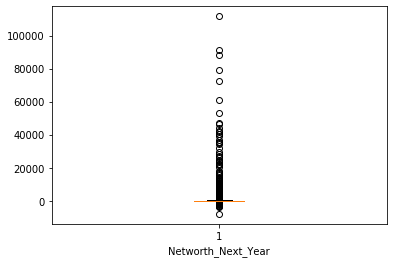

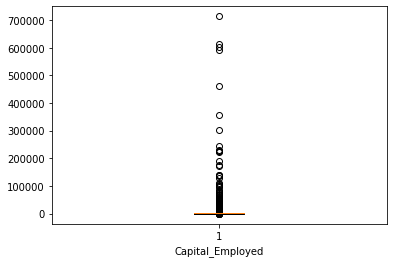

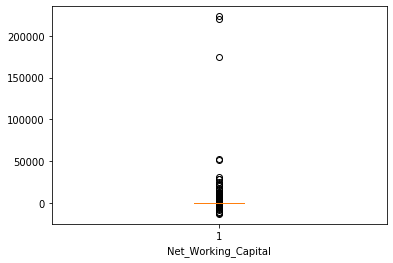

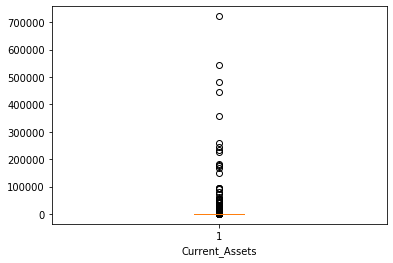

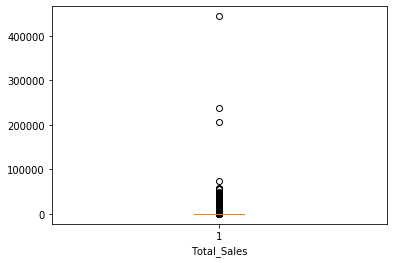

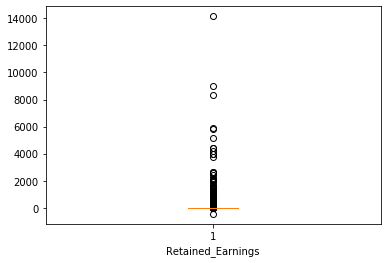

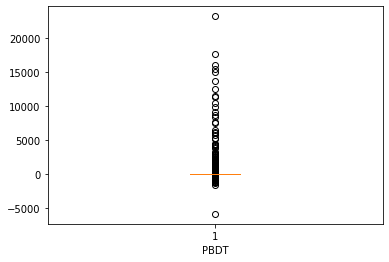

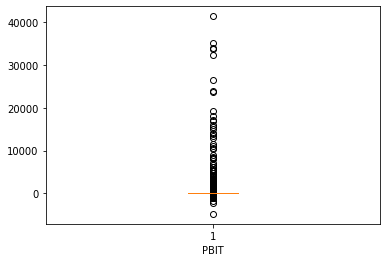

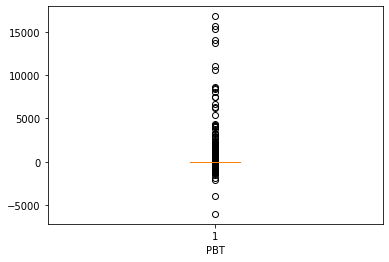

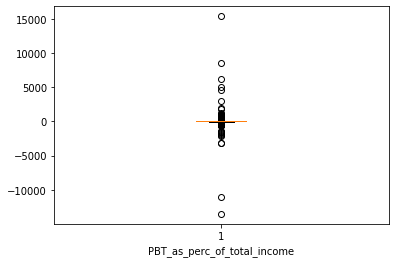

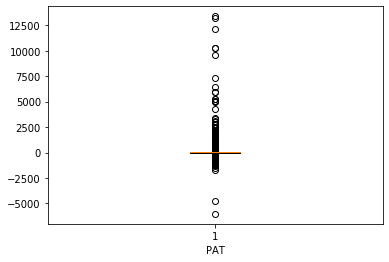

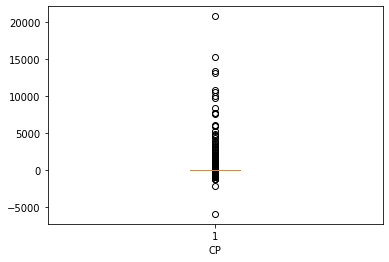

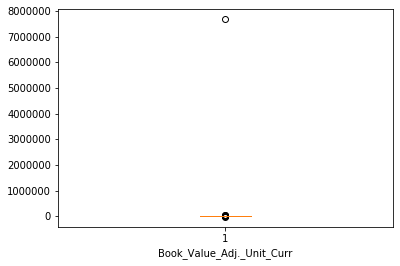

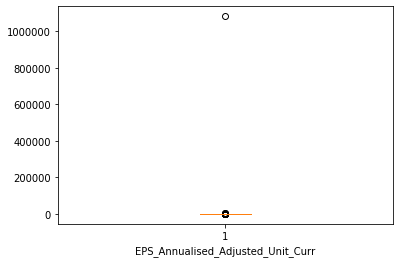

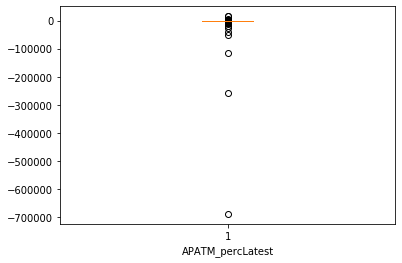

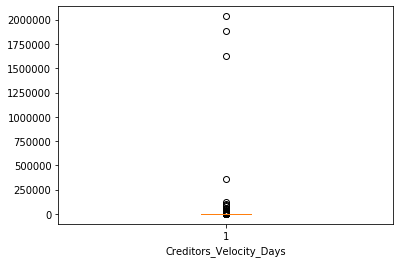

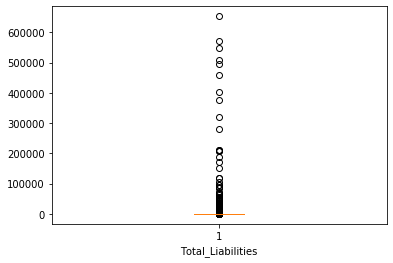

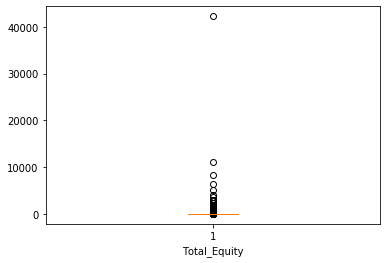

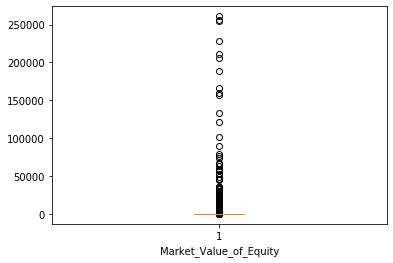

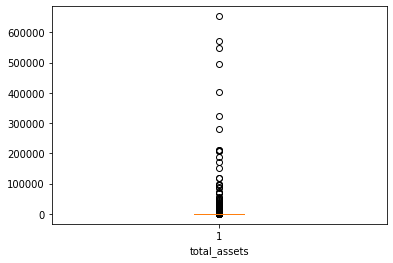

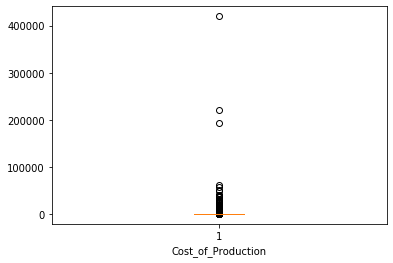

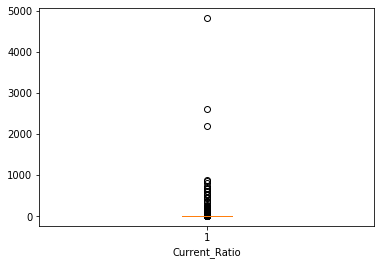

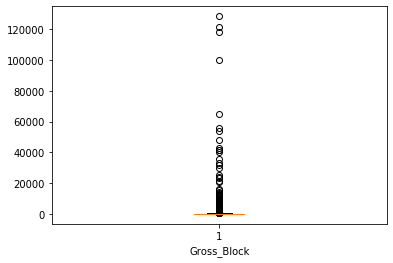

In [18]:
import matplotlib.pyplot as plt
for i in range(len(df.columns)):
    plt.boxplot(df[col[i]])
    plt.xlabel(col[i])
    plt.show()

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Networth_Next_Year                   119.8175
Capital_Employed                     219.0025
Net_Working_Capital                   60.2325
Current_Assets                       130.7875
Total_Sales                          233.0000
Retained_Earnings                      3.6150
PBDT                                  12.9450
PBIT                                  16.4450
PBT                                    7.4825
PBT_as_perc_of_total_income            4.0000
PAT                                    5.6000
CP                                    10.9100
Book_Value_Adj._Unit_Curr             52.6600
EPS_Annualised_Adjusted_Unit_Curr      4.1175
APATM_percLatest                       7.4075
Creditors_Velocity_Days               81.0000
Total_Liabilities                    113.6675
Total_Equity                          15.7925
Market_Value_of_Equity               111.4575
total_assets                          94.3925
Cost_of_Production                   188.6100
Current_Ratio                     

In [20]:
outs=df[(df < (Q1 - 1.5* IQR)) | (df > (Q3 + 1.5 * IQR))].count()

In [21]:
outs=pd.DataFrame(outs)

In [22]:
outs

0
Networth_Next_Year                 676
Capital_Employed                   596
Net_Working_Capital                625
Current_Assets                     576
Total_Sales                        556
Retained_Earnings                  603
PBDT                               815
PBIT                               722
PBT                                941
PBT_as_perc_of_total_income        874
PAT                                959
CP                                 816
Book_Value_Adj._Unit_Curr          484
EPS_Annualised_Adjusted_Unit_Curr  510
APATM_percLatest                   934
Creditors_Velocity_Days            389
Total_Liabilities                  602
Total_Equity                       449
Market_Value_of_Equity             639
total_assets                       572
Cost_of_Production                 560
Current_Ratio                      565
Gross_Block                        540

In [23]:
outs['perc of outliers']=outs[0]/3586*100

In [24]:
outs

0  perc of outliers
Networth_Next_Year                 676         18.851088
Capital_Employed                   596         16.620190
Net_Working_Capital                625         17.428890
Current_Assets                     576         16.062465
Total_Sales                        556         15.504741
Retained_Earnings                  603         16.815393
PBDT                               815         22.727273
PBIT                               722         20.133854
PBT                                941         26.240937
PBT_as_perc_of_total_income        874         24.372560
PAT                                959         26.742889
CP                                 816         22.755159
Book_Value_Adj._Unit_Curr          484         13.496933
EPS_Annualised_Adjusted_Unit_Curr  510         14.221974
APATM_percLatest                   934         26.045733
Creditors_Velocity_Days            389         10.847741
Total_Liabilities                  602         16.787507
Total_Equity                       449         12.520915
Market_Value_of_Equity             639         17.819297
total_assets                       572         15.950920
Cost_of_Production                 560         15.616286
Current_Ratio                      565         15.755717
Gross_Block                        540         15.058561

There are several ways to handle/treat infinite values in variables. One should proceed with an approach only when value ('infinite' in this case) is erroneous.

And in such cases, one should understand the cause of such erroneous values & select an approach to handle/treat them accordingly to avoid incorrect predictions.

Few approaches one may adopt:

1. replace infinite values in 'Profit margin' using some imputation technique
2. perform zero value imputation on denominator variable or
3. perform division only for values where denominator is more than X & let 'Profit margin' be zero otherwise i.e.

For values > X :
- Perform division A / X
For values = X:
- Let new profit margin value be X

In [25]:
df['total_assets'].min()

0.01

In [26]:
df['total_assets'].max()

653267.37

In [27]:
df['Total_Sales'].min()

-62.59

In [28]:
df['Total_Sales'].max()

443775.16

In [29]:
pd.DataFrame(df[(df['Total_Sales']>0) | (df['Total_Sales']<1)]['Total_Sales'].sort_values(ascending=False).unique())

0
0     443775.16
1     238086.91
2     206626.19
3      73236.94
4      57462.53
5      57017.41
6      56741.98
7      55496.40
8      48469.90
9      47300.00
10     46315.36
11     46087.32
12     45730.36
13     43429.91
14     42963.56
15     41903.37
16     41785.00
17     39500.95
18     38444.83
19     37919.26
20     36507.40
21     36301.63
22     35478.60
23     34525.03
24     34450.64
25     32502.41
26     31279.47
27     30805.62
28     30726.79
29     28307.96
30     28153.99
31     27585.30
32     27401.16
33     27212.64
34     24896.62
35     22130.72
36     21615.16
37     21612.01
38     20384.41
39     19961.38
40     19716.12
41     19556.44
42     17177.23
43     15852.94
44     15730.03
45     14915.85
46     14494.01
47     13925.34
48     13916.46
49     13559.14
50     13234.80
51     13081.65
52     12085.50
53     12021.38
54     11572.01
55     11285.26
56     11050.31
57     10994.03
58     10763.49
59     10645.77
60     10624.61
61     10247.42
62     10083.60
63     10011.00
64      9748.23
65      9719.87
66      9691.96
67      8967.34
68      8896.44
69      8882.14
70      8637.05
71      8588.55
72      8519.69
73      8296.94
74      8250.19
75      8095.10
76      8028.44
77      7419.47
78      7382.81
79      7175.99
80      7157.93
81      7061.13
82      6802.25
83      6603.63
84      6592.09
85      6348.52
86      6332.58
87      6188.80
88      6010.94
89      5978.96
90      5869.48
91      5744.20
92      5742.04
93      5593.88
94      5585.23
95      5581.58
96      5541.42
97      5507.61
98      5500.16
99      5431.28
100     5395.88
101     5392.24
102     5334.99
103     5324.56
104     5286.22
105     5284.40
106     5243.07
107     5224.69
108     5203.90
109     5010.97
110     4985.00
111     4881.51
112     4814.97
113     4744.40
114     4705.76
115     4681.20
116     4617.55
117     4548.05
118     4531.46
119     4405.80
120     4403.88
121     4403.48
122     4402.11
123     4324.52
124     4319.35
125     4307.59
126     4234.05
127     4134.80
128     4126.88
129     3985.83
130     3975.00
131     3944.13
132     3909.36
133     3887.25
134     3883.88
135     3824.84
136     3779.90
137     3754.14
138     3746.05
139     3723.30
140     3711.77
141     3710.72
142     3690.46
143     3644.89
144     3547.40
145     3532.67
146     3509.96
147     3475.55
148     3451.60
149     3426.20
150     3365.00
151     3341.10
152     3306.72
153     3287.57
154     3277.42
155     3260.17
156     3247.83
157     3221.16
158     3209.89
159     3185.62
160     3176.30
161     3152.97
162     3137.56
163     3117.42
164     3113.02
165     3087.84
166     3084.00
167     3080.79
168     3030.10
169     3026.45
170     3024.27
171     3003.36
172     2969.85
173     2933.08
174     2892.73
175     2884.52
176     2870.65
177     2840.82
178     2836.41
179     2781.73
180     2775.37
181     2761.38
182     2711.88
183     2698.86
184     2694.00
185     2687.95
186     2670.25
187     2644.67
188     2640.74
189     2624.10
190     2576.87
191     2560.59
192     2558.55
193     2555.65
194     2551.08
195     2531.52
196     2531.30
197     2507.11
198     2483.34
199     2476.15
200     2472.81
201     2449.62
202     2449.34
203     2449.09
204     2414.19
205     2404.95
206     2403.67
207     2384.82
208     2382.38
209     2378.27
210     2369.54
211     2363.72
212     2359.90
213     2325.78
214     2318.84
215     2274.41
216     2270.30
217     2268.50
218     2243.62
219     2241.60
220     2233.14
221     2196.75
222     2170.11
223     2163.71
224     2153.78
225     2149.61
226     2128.89
227     2118.32
228     2100.57
229     2095.89
230     2094.17
231     2074.47
232     2060.82
233     2044.28
234     2030.95
235     2030.64
236     2029.94
237     2018.99
238     2009.02
239     1997.71
240     1979.87
241     1975.73
242     1966.66
243     1953.09
244     1948.48
245     1948.13
246     1935.05
247     1914.41
248     1896.09
249     1890.3

So to avoid abiguity of infinite value,least positive value near to zero is considered for denominator.

So replacing zero by 0.01.

In [30]:
np.where(df['Total_Sales']==0,0.01,df['Total_Sales'])

array([1.0000000e-02, 2.8927300e+03, 3.9213000e+02, ..., 4.4377516e+05,
       7.3236940e+04, 5.5496400e+04])

In [31]:
df['Total_Sales']=np.where(((df['Total_Sales']==0) & (df['PBT']>0)),0.01,df['Total_Sales'])
df['Total_Sales']=np.where(((df['Total_Sales']==0) & (df['PBT']<0)),-0.01,df['Total_Sales'])

In [32]:
df.head()

Networth_Next_Year  Capital_Employed  Net_Working_Capital  Current_Assets  \
0            -8021.60          -1007.24             -1076.34           40.50   
1            -3986.19           4458.20             -1098.88          486.86   
2            -3192.58           7714.68              4496.25         9097.64   
3            -3054.51           2353.88             -2612.42         1034.12   
4            -2967.36           4675.33              1836.23         4685.81   

   Total_Sales  Retained_Earnings     PBDT    PBIT      PBT  \
0        -0.01               7.60  -926.52 -185.53  -932.99   
1      2892.73              46.27    -4.32   35.53  -615.25   
2       392.13               9.55 -1086.71 -381.10 -1185.89   
3      1354.39             223.85  -677.57 -336.73  -801.29   
4        38.72               9.82  -944.42 -710.13 -1006.69   

   PBT_as_perc_of_total_income     PAT      CP  Book_Value_Adj._Unit_Curr  \
0                  -122.761842 -932.99 -926.52                    -167.58   
1                   -13.296953 -615.25   -4.32                     -15.18   
2                  -124.176963 -897.70 -798.52                      94.14   
3                    -3.579585 -801.29 -677.57                     -39.64   
4                  -102.514257 -864.58 -802.31                    -212.89   

   EPS_Annualised_Adjusted_Unit_Curr  APATM_percLatest  \
0                                0.0              0.00   
1                                0.0            -87.18   
2                                0.0          -7961.51   
3                                0.0            -51.58   
4                                0.0            274.79   

   Creditors_Velocity_Days  Total_Liabilities  Total_Equity  \
0                      0.0            5936.03        419.36   
1                    101.0            7410.18       1954.93   
2                    558.0            6944.54         53.84   
3                     63.0            2326.05        157.30   
4                    346.0            5740.90         50.30   

   Market_Value_of_Equity  total_assets  Cost_of_Production  Current_Ratio  \
0                    0.00       6355.39              137.67           0.02   
1                 1544.39       9365.11             2572.46           0.08   
2                 1220.81       6998.38              408.51           1.06   
3                  194.27       2483.35             1326.99           0.09   
4                  113.68       5791.20              186.29           0.50   

   Gross_Block  
0       474.30  
1      9070.86  
2      1281.54  
3      1033.69  
4      1084.20

# So non zero values for denominator now replaced by 0.01

In [33]:
 df[df['total_assets']==0]

Empty DataFrame
Columns: [Networth_Next_Year, Capital_Employed, Net_Working_Capital, Current_Assets, Total_Sales, Retained_Earnings, PBDT, PBIT, PBT, PBT_as_perc_of_total_income, PAT, CP, Book_Value_Adj._Unit_Curr, EPS_Annualised_Adjusted_Unit_Curr, APATM_percLatest, Creditors_Velocity_Days, Total_Liabilities, Total_Equity, Market_Value_of_Equity, total_assets, Cost_of_Production, Current_Ratio, Gross_Block]
Index: []

In [34]:
np.isfinite(df).sum()

Networth_Next_Year                   3586
Capital_Employed                     3586
Net_Working_Capital                  3586
Current_Assets                       3586
Total_Sales                          3586
Retained_Earnings                    3586
PBDT                                 3586
PBIT                                 3586
PBT                                  3586
PBT_as_perc_of_total_income          3586
PAT                                  3586
CP                                   3586
Book_Value_Adj._Unit_Curr            3586
EPS_Annualised_Adjusted_Unit_Curr    3586
APATM_percLatest                     3586
Creditors_Velocity_Days              3586
Total_Liabilities                    3586
Total_Equity                         3586
Market_Value_of_Equity               3586
total_assets                         3586
Cost_of_Production                   3586
Current_Ratio                        3586
Gross_Block                          3586
dtype: int64

In [35]:
df[df['Total_Equity']==0]

Empty DataFrame
Columns: [Networth_Next_Year, Capital_Employed, Net_Working_Capital, Current_Assets, Total_Sales, Retained_Earnings, PBDT, PBIT, PBT, PBT_as_perc_of_total_income, PAT, CP, Book_Value_Adj._Unit_Curr, EPS_Annualised_Adjusted_Unit_Curr, APATM_percLatest, Creditors_Velocity_Days, Total_Liabilities, Total_Equity, Market_Value_of_Equity, total_assets, Cost_of_Production, Current_Ratio, Gross_Block]
Index: []

# Total assets and total equity are not zero so infinity issue will not arise there

Return on Total Asset = Profit Before Tax(PBT)/ Total Assets

Profit Margin = Profit Before Tax(PBT)/Total Sales or Revenue

Debt to Equity Ratio = Total Liabilities / Total Equity

Lets create above three new variables

In [36]:
df['Return_on_Total_Asset']=df['PBT']/df['total_assets']

In [37]:
df['Profit_Margin']=df['PBT']/df['Total_Sales']

In [38]:
df['Debt_to_Equity_Ratio']=df['Total_Liabilities']/df['Total_Equity']

In [39]:
df.head()

Networth_Next_Year  Capital_Employed  Net_Working_Capital  Current_Assets  \
0            -8021.60          -1007.24             -1076.34           40.50   
1            -3986.19           4458.20             -1098.88          486.86   
2            -3192.58           7714.68              4496.25         9097.64   
3            -3054.51           2353.88             -2612.42         1034.12   
4            -2967.36           4675.33              1836.23         4685.81   

   Total_Sales  Retained_Earnings     PBDT    PBIT      PBT  \
0        -0.01               7.60  -926.52 -185.53  -932.99   
1      2892.73              46.27    -4.32   35.53  -615.25   
2       392.13               9.55 -1086.71 -381.10 -1185.89   
3      1354.39             223.85  -677.57 -336.73  -801.29   
4        38.72               9.82  -944.42 -710.13 -1006.69   

   PBT_as_perc_of_total_income     PAT      CP  Book_Value_Adj._Unit_Curr  \
0                  -122.761842 -932.99 -926.52                    -167.58   
1                   -13.296953 -615.25   -4.32                     -15.18   
2                  -124.176963 -897.70 -798.52                      94.14   
3                    -3.579585 -801.29 -677.57                     -39.64   
4                  -102.514257 -864.58 -802.31                    -212.89   

   EPS_Annualised_Adjusted_Unit_Curr  APATM_percLatest  \
0                                0.0              0.00   
1                                0.0            -87.18   
2                                0.0          -7961.51   
3                                0.0            -51.58   
4                                0.0            274.79   

   Creditors_Velocity_Days  Total_Liabilities  Total_Equity  \
0                      0.0            5936.03        419.36   
1                    101.0            7410.18       1954.93   
2                    558.0            6944.54         53.84   
3                     63.0            2326.05        157.30   
4                    346.0            5740.90         50.30   

   Market_Value_of_Equity  total_assets  Cost_of_Production  Current_Ratio  \
0                    0.00       6355.39              137.67           0.02   
1                 1544.39       9365.11             2572.46           0.08   
2                 1220.81       6998.38              408.51           1.06   
3                  194.27       2483.35             1326.99           0.09   
4                  113.68       5791.20              186.29           0.50   

   Gross_Block  Return_on_Total_Asset  Profit_Margin  Debt_to_Equity_Ratio  
0       474.30              -0.146803   93299.000000             14.154974  
1      9070.86              -0.065696      -0.212688              3.790509  
2      1281.54              -0.169452      -3.024227            128.984770  
3      1033.69              -0.322665      -0.591624             14.787349  
4      1084.20              -0.173831     -25.999225            114.133201

In [40]:
df[df['PBT']<0]

Networth_Next_Year  Capital_Employed  Net_Working_Capital  \
0               -8021.60          -1007.24             -1076.34   
1               -3986.19           4458.20             -1098.88   
2               -3192.58           7714.68              4496.25   
3               -3054.51           2353.88             -2612.42   
4               -2967.36           4675.33              1836.23   
6               -2125.05           1536.08               804.82   
7               -2100.56            979.13               263.95   
8               -1695.75           -613.79             -1121.96   
9               -1677.18             86.35              -390.53   
10              -1403.70           -220.49              -611.84   
11              -1243.33           2057.86               565.64   
12              -1138.48             39.83              -147.75   
13              -1038.86            602.19             -1456.25   
14               -981.21            -32.81              -197.77   
16               -854.42            807.85               300.83   
17               -838.28           2799.73               789.42   
18               -834.09             -7.54                -8.45   
19               -814.48            917.03               570.34   
20               -781.73           -465.80              -528.76   
21               -687.37           -150.04              -280.30   
22               -681.26            763.88               264.63   
23               -666.97           1148.03               989.39   
24               -647.90            914.09               425.64   
25               -595.87           -457.71              -464.63   
26               -577.39           -286.87              -341.12   
27               -479.59           -104.42              -136.00   
28               -473.02            159.34                13.12   
29               -463.82           7548.35              4712.13   
30               -457.25              1.82              -110.62   
31               -453.08            129.38                69.60   
32               -402.46            -22.53              -210.79   
34               -398.08           1915.19              1552.57   
35               -386.75           -172.57              -286.44   
36               -383.86           -147.77              -225.90   
37               -377.37            439.53                35.01   
38               -375.73            -18.49               -31.65   
39               -371.13            -45.94              -241.21   
40               -371.05            182.28              -197.62   
41               -369.55            859.21                82.32   
42               -343.97            183.61               100.49   
43               -343.83             10.89                -0.98   
44               -339.73            183.32                17.96   
45               -337.44            249.66               116.47   
46               -337.35           1777.72              1129.02   
48               -276.27            337.37               108.49   
49               -275.73             14.94                -0.34   
50               -270.21           1726.26               101.86   
51               -268.91             12.72              -134.63   
52               -268.72             22.64               -49.40   
53               -259.18           2482.54              1169.65   
54               -253.68           1007.74               517.84   
55               -242.78            -44.76               -56.53   
56               -239.53            235.21                -4.95   
57               -239.19            218.13                91.74   
58               -238.01              6.99                -0.05   
59               -236.65           -161.15              -237.24   
60               -229.38            476.30               316.13   
61               -224.10            130.28               112.04   
62               -224.05            168.84           

In [41]:
np.isinf(df).sum()

Networth_Next_Year                   0
Capital_Employed                     0
Net_Working_Capital                  0
Current_Assets                       0
Total_Sales                          0
Retained_Earnings                    0
PBDT                                 0
PBIT                                 0
PBT                                  0
PBT_as_perc_of_total_income          0
PAT                                  0
CP                                   0
Book_Value_Adj._Unit_Curr            0
EPS_Annualised_Adjusted_Unit_Curr    0
APATM_percLatest                     0
Creditors_Velocity_Days              0
Total_Liabilities                    0
Total_Equity                         0
Market_Value_of_Equity               0
total_assets                         0
Cost_of_Production                   0
Current_Ratio                        0
Gross_Block                          0
Return_on_Total_Asset                0
Profit_Margin                        0
Debt_to_Equity_Ratio     

# No infinite values in above dataset

# So now data is cleaned and it is without NaN and infinite values


In [42]:
df['Default']=np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [43]:
df.head()

Networth_Next_Year  Capital_Employed  Net_Working_Capital  Current_Assets  \
0            -8021.60          -1007.24             -1076.34           40.50   
1            -3986.19           4458.20             -1098.88          486.86   
2            -3192.58           7714.68              4496.25         9097.64   
3            -3054.51           2353.88             -2612.42         1034.12   
4            -2967.36           4675.33              1836.23         4685.81   

   Total_Sales  Retained_Earnings     PBDT    PBIT      PBT  \
0        -0.01               7.60  -926.52 -185.53  -932.99   
1      2892.73              46.27    -4.32   35.53  -615.25   
2       392.13               9.55 -1086.71 -381.10 -1185.89   
3      1354.39             223.85  -677.57 -336.73  -801.29   
4        38.72               9.82  -944.42 -710.13 -1006.69   

   PBT_as_perc_of_total_income     PAT      CP  Book_Value_Adj._Unit_Curr  \
0                  -122.761842 -932.99 -926.52                    -167.58   
1                   -13.296953 -615.25   -4.32                     -15.18   
2                  -124.176963 -897.70 -798.52                      94.14   
3                    -3.579585 -801.29 -677.57                     -39.64   
4                  -102.514257 -864.58 -802.31                    -212.89   

   EPS_Annualised_Adjusted_Unit_Curr  APATM_percLatest  \
0                                0.0              0.00   
1                                0.0            -87.18   
2                                0.0          -7961.51   
3                                0.0            -51.58   
4                                0.0            274.79   

   Creditors_Velocity_Days  Total_Liabilities  Total_Equity  \
0                      0.0            5936.03        419.36   
1                    101.0            7410.18       1954.93   
2                    558.0            6944.54         53.84   
3                     63.0            2326.05        157.30   
4                    346.0            5740.90         50.30   

   Market_Value_of_Equity  total_assets  Cost_of_Production  Current_Ratio  \
0                    0.00       6355.39              137.67           0.02   
1                 1544.39       9365.11             2572.46           0.08   
2                 1220.81       6998.38              408.51           1.06   
3                  194.27       2483.35             1326.99           0.09   
4                  113.68       5791.20              186.29           0.50   

   Gross_Block  Return_on_Total_Asset  Profit_Margin  Debt_to_Equity_Ratio  \
0       474.30              -0.146803   93299.000000             14.154974   
1      9070.86              -0.065696      -0.212688              3.790509   
2      1281.54              -0.169452      -3.024227            128.984770   
3      1033.69              -0.322665      -0.591624             14.787349   
4      1084.20              -0.173831     -25.999225            114.133201   

   Default  
0        1  
1        1  
2        1  
3        1  
4        1

In [44]:
df['Default'].value_counts()

0    3198
1     388
Name: Default, dtype: int64

In [45]:
df.isna().sum()

Networth_Next_Year                    0
Capital_Employed                      0
Net_Working_Capital                   0
Current_Assets                        0
Total_Sales                           0
Retained_Earnings                     0
PBDT                                  0
PBIT                                  0
PBT                                   0
PBT_as_perc_of_total_income           0
PAT                                   0
CP                                    0
Book_Value_Adj._Unit_Curr             0
EPS_Annualised_Adjusted_Unit_Curr     0
APATM_percLatest                      0
Creditors_Velocity_Days               0
Total_Liabilities                     0
Total_Equity                          0
Market_Value_of_Equity                0
total_assets                          0
Cost_of_Production                    0
Current_Ratio                         0
Gross_Block                           0
Return_on_Total_Asset                 0
Profit_Margin                        27


In [46]:
df['Profit_Margin'].fillna(df['Profit_Margin'].median(), inplace = True)

In [47]:
df.columns.shape

(27,)

In [48]:
np.isinf(df).sum()

Networth_Next_Year                   0
Capital_Employed                     0
Net_Working_Capital                  0
Current_Assets                       0
Total_Sales                          0
Retained_Earnings                    0
PBDT                                 0
PBIT                                 0
PBT                                  0
PBT_as_perc_of_total_income          0
PAT                                  0
CP                                   0
Book_Value_Adj._Unit_Curr            0
EPS_Annualised_Adjusted_Unit_Curr    0
APATM_percLatest                     0
Creditors_Velocity_Days              0
Total_Liabilities                    0
Total_Equity                         0
Market_Value_of_Equity               0
total_assets                         0
Cost_of_Production                   0
Current_Ratio                        0
Gross_Block                          0
Return_on_Total_Asset                0
Profit_Margin                        0
Debt_to_Equity_Ratio     

In [49]:
df.duplicated().sum()

0

In [50]:
df['Total_Sales'].unique()

array([-1.0000000e-02,  2.8927300e+03,  3.9213000e+02, ...,
        4.4377516e+05,  7.3236940e+04,  5.5496400e+04])

In [51]:
df.head(50)

Networth_Next_Year  Capital_Employed  Net_Working_Capital  Current_Assets  \
0             -8021.60          -1007.24             -1076.34           40.50   
1             -3986.19           4458.20             -1098.88          486.86   
2             -3192.58           7714.68              4496.25         9097.64   
3             -3054.51           2353.88             -2612.42         1034.12   
4             -2967.36           4675.33              1836.23         4685.81   
5             -2519.40          -1824.75             -1843.74            0.00   
6             -2125.05           1536.08               804.82          834.86   
7             -2100.56            979.13               263.95          705.76   
8             -1695.75           -613.79             -1121.96          117.67   
9             -1677.18             86.35              -390.53         2536.78   
10            -1403.70           -220.49              -611.84           22.29   
11            -1243.33           2057.86               565.64          868.34   
12            -1138.48             39.83              -147.75          209.05   
13            -1038.86            602.19             -1456.25          548.14   
14             -981.21            -32.81              -197.77          131.31   
15             -949.14            885.37               766.70         1176.47   
16             -854.42            807.85               300.83          501.39   
17             -838.28           2799.73               789.42         2181.38   
18             -834.09             -7.54                -8.45            6.10   
19             -814.48            917.03               570.34           24.54   
20             -781.73           -465.80              -528.76          140.95   
21             -687.37           -150.04              -280.30           85.94   
22             -681.26            763.88               264.63          450.89   
23             -666.97           1148.03               989.39         1120.24   
24             -647.90            914.09               425.64          544.97   
25             -595.87           -457.71              -464.63            2.33   
26             -577.39           -286.87              -341.12           33.48   
27             -479.59           -104.42              -136.00           26.47   
28             -473.02            159.34                13.12           53.81   
29             -463.82           7548.35              4712.13         6299.86   
30             -457.25              1.82              -110.62           73.59   
31             -453.08            129.38                69.60           86.96   
32             -402.46            -22.53              -210.79          109.17   
33             -399.37           -277.06              -260.18           30.51   
34             -398.08           1915.19              1552.57         3358.59   
35             -386.75           -172.57              -286.44          266.34   
36             -383.86           -147.77              -225.90           34.72   
37             -377.37            439.53                35.01           66.55   
38             -375.73            -18.49               -31.65           12.07   
39             -371.13            -45.94              -241.21          577.53   
40             -371.05            182.28              -197.62           52.65   
41             -369.55            859.21                82.32          188.73   
42             -343.97            183.61               100.49          281.14   
43             -343.83             10.89                -0.98            0.35   
44             -339.73            183.32                17.96          112.38   
45             -337.44            249.66               116.47          137.84   
46             -337.35           1777.72              1129.02         1173.65   
47             -301.41           2608.24              1651.21         2081.36   
48             -276.27            3

In [52]:
df[df['Total_Sales']==-0.01].shape

(211, 27)

In [53]:
df[df['Total_Sales']==0.01].shape

(85, 27)

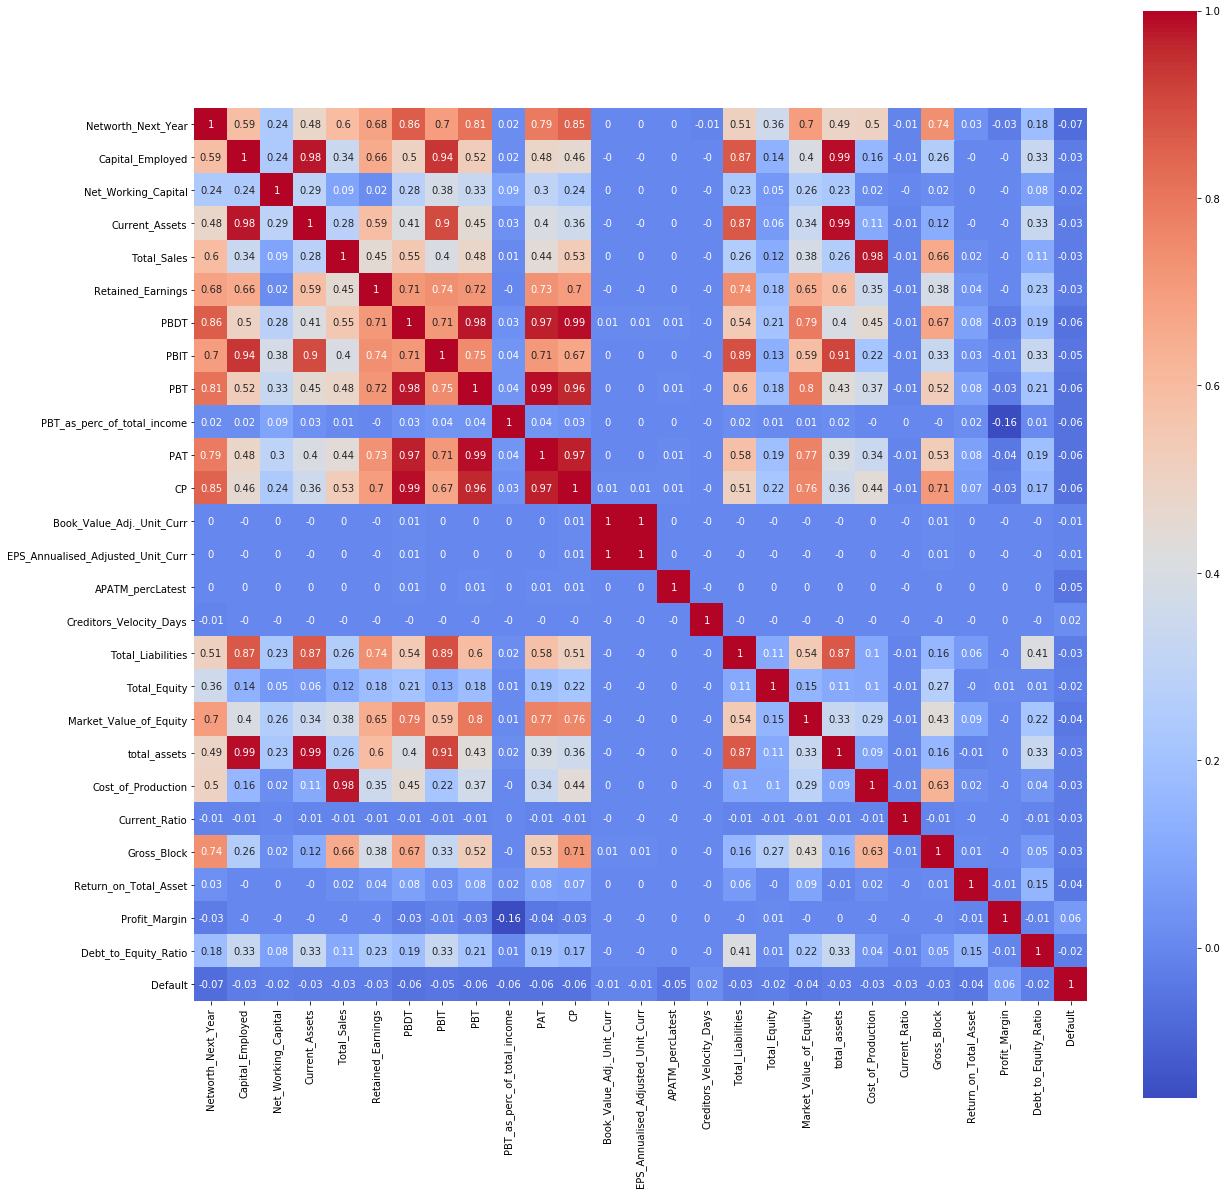

In [54]:
plt.figure(figsize=(20,20))  # setting the size of figure to 12 by 10
p=sns.heatmap(df.corr().round(2), annot=True,cmap='coolwarm',square=True)

#  It can be observed that newly formed variable dont have any correlation with their members of ratio

In [55]:
corr=df.corr().round(2)

In [56]:
col=corr.columns

In [57]:
for i in range(len(col)):
    display(abs(corr).sort_values(by = col[i], ascending = False)[col[i]].head(7))
    

Networth_Next_Year    1.00
PBDT                  0.86
CP                    0.85
PBT                   0.81
PAT                   0.79
Gross_Block           0.74
PBIT                  0.70
Name: Networth_Next_Year, dtype: float64

Capital_Employed      1.00
total_assets          0.99
Current_Assets        0.98
PBIT                  0.94
Total_Liabilities     0.87
Retained_Earnings     0.66
Networth_Next_Year    0.59
Name: Capital_Employed, dtype: float64

Net_Working_Capital       1.00
PBIT                      0.38
PBT                       0.33
PAT                       0.30
Current_Assets            0.29
PBDT                      0.28
Market_Value_of_Equity    0.26
Name: Net_Working_Capital, dtype: float64

Current_Assets        1.00
total_assets          0.99
Capital_Employed      0.98
PBIT                  0.90
Total_Liabilities     0.87
Retained_Earnings     0.59
Networth_Next_Year    0.48
Name: Current_Assets, dtype: float64

Total_Sales           1.00
Cost_of_Production    0.98
Gross_Block           0.66
Networth_Next_Year    0.60
PBDT                  0.55
CP                    0.53
PBT                   0.48
Name: Total_Sales, dtype: float64

Retained_Earnings    1.00
Total_Liabilities    0.74
PBIT                 0.74
PAT                  0.73
PBT                  0.72
PBDT                 0.71
CP                   0.70
Name: Retained_Earnings, dtype: float64

PBDT                      1.00
CP                        0.99
PBT                       0.98
PAT                       0.97
Networth_Next_Year        0.86
Market_Value_of_Equity    0.79
Retained_Earnings         0.71
Name: PBDT, dtype: float64

PBIT                 1.00
Capital_Employed     0.94
total_assets         0.91
Current_Assets       0.90
Total_Liabilities    0.89
PBT                  0.75
Retained_Earnings    0.74
Name: PBIT, dtype: float64

PBT                       1.00
PAT                       0.99
PBDT                      0.98
CP                        0.96
Networth_Next_Year        0.81
Market_Value_of_Equity    0.80
PBIT                      0.75
Name: PBT, dtype: float64

PBT_as_perc_of_total_income    1.00
Profit_Margin                  0.16
Net_Working_Capital            0.09
Default                        0.06
PBIT                           0.04
PBT                            0.04
PAT                            0.04
Name: PBT_as_perc_of_total_income, dtype: float64

PAT                       1.00
PBT                       0.99
PBDT                      0.97
CP                        0.97
Networth_Next_Year        0.79
Market_Value_of_Equity    0.77
Retained_Earnings         0.73
Name: PAT, dtype: float64

CP                        1.00
PBDT                      0.99
PAT                       0.97
PBT                       0.96
Networth_Next_Year        0.85
Market_Value_of_Equity    0.76
Gross_Block               0.71
Name: CP, dtype: float64

EPS_Annualised_Adjusted_Unit_Curr    1.00
Book_Value_Adj._Unit_Curr            1.00
PBDT                                 0.01
Gross_Block                          0.01
CP                                   0.01
Default                              0.01
Retained_Earnings                    0.00
Name: Book_Value_Adj._Unit_Curr, dtype: float64

EPS_Annualised_Adjusted_Unit_Curr    1.00
Book_Value_Adj._Unit_Curr            1.00
PBDT                                 0.01
Gross_Block                          0.01
CP                                   0.01
Default                              0.01
Retained_Earnings                    0.00
Name: EPS_Annualised_Adjusted_Unit_Curr, dtype: float64

APATM_percLatest     1.00
Default              0.05
PBDT                 0.01
PBT                  0.01
PAT                  0.01
CP                   0.01
Total_Liabilities    0.00
Name: APATM_percLatest, dtype: float64

Creditors_Velocity_Days    1.00
Default                    0.02
Networth_Next_Year         0.01
Current_Assets             0.00
Total_Sales                0.00
Debt_to_Equity_Ratio       0.00
Profit_Margin              0.00
Name: Creditors_Velocity_Days, dtype: float64

Total_Liabilities    1.00
PBIT                 0.89
Current_Assets       0.87
Capital_Employed     0.87
total_assets         0.87
Retained_Earnings    0.74
PBT                  0.60
Name: Total_Liabilities, dtype: float64

Total_Equity          1.00
Networth_Next_Year    0.36
Gross_Block           0.27
CP                    0.22
PBDT                  0.21
PAT                   0.19
PBT                   0.18
Name: Total_Equity, dtype: float64

Market_Value_of_Equity    1.00
PBT                       0.80
PBDT                      0.79
PAT                       0.77
CP                        0.76
Networth_Next_Year        0.70
Retained_Earnings         0.65
Name: Market_Value_of_Equity, dtype: float64

total_assets          1.00
Current_Assets        0.99
Capital_Employed      0.99
PBIT                  0.91
Total_Liabilities     0.87
Retained_Earnings     0.60
Networth_Next_Year    0.49
Name: total_assets, dtype: float64

Cost_of_Production    1.00
Total_Sales           0.98
Gross_Block           0.63
Networth_Next_Year    0.50
PBDT                  0.45
CP                    0.44
PBT                   0.37
Name: Cost_of_Production, dtype: float64

Current_Ratio           1.00
Default                 0.03
CP                      0.01
Debt_to_Equity_Ratio    0.01
Gross_Block             0.01
Cost_of_Production      0.01
total_assets            0.01
Name: Current_Ratio, dtype: float64

Gross_Block           1.00
Networth_Next_Year    0.74
CP                    0.71
PBDT                  0.67
Total_Sales           0.66
Cost_of_Production    0.63
PAT                   0.53
Name: Gross_Block, dtype: float64

Return_on_Total_Asset     1.00
Debt_to_Equity_Ratio      0.15
Market_Value_of_Equity    0.09
PAT                       0.08
PBDT                      0.08
PBT                       0.08
CP                        0.07
Name: Return_on_Total_Asset, dtype: float64

Profit_Margin                  1.00
PBT_as_perc_of_total_income    0.16
Default                        0.06
PAT                            0.04
PBT                            0.03
CP                             0.03
Networth_Next_Year             0.03
Name: Profit_Margin, dtype: float64

Debt_to_Equity_Ratio    1.00
Total_Liabilities       0.41
PBIT                    0.33
Capital_Employed        0.33
total_assets            0.33
Current_Assets          0.33
Retained_Earnings       0.23
Name: Debt_to_Equity_Ratio, dtype: float64

Default                        1.00
Networth_Next_Year             0.07
Profit_Margin                  0.06
PBDT                           0.06
PBT                            0.06
PBT_as_perc_of_total_income    0.06
PAT                            0.06
Name: Default, dtype: float64

In [58]:
import matplotlib.pyplot as plt
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [59]:
col

Index(['Networth_Next_Year', 'Capital_Employed', 'Net_Working_Capital',
       'Current_Assets', 'Total_Sales', 'Retained_Earnings', 'PBDT', 'PBIT',
       'PBT', 'PBT_as_perc_of_total_income', 'PAT', 'CP',
       'Book_Value_Adj._Unit_Curr', 'EPS_Annualised_Adjusted_Unit_Curr',
       'APATM_percLatest', 'Creditors_Velocity_Days', 'Total_Liabilities',
       'Total_Equity', 'Market_Value_of_Equity', 'total_assets',
       'Cost_of_Production', 'Current_Ratio', 'Gross_Block',
       'Return_on_Total_Asset', 'Profit_Margin', 'Debt_to_Equity_Ratio',
       'Default'],
      dtype='object')

In [60]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [61]:
for column in df.iloc[:,0:25]:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [62]:
df.isna().sum()

Networth_Next_Year                   0
Capital_Employed                     0
Net_Working_Capital                  0
Current_Assets                       0
Total_Sales                          0
Retained_Earnings                    0
PBDT                                 0
PBIT                                 0
PBT                                  0
PBT_as_perc_of_total_income          0
PAT                                  0
CP                                   0
Book_Value_Adj._Unit_Curr            0
EPS_Annualised_Adjusted_Unit_Curr    0
APATM_percLatest                     0
Creditors_Velocity_Days              0
Total_Liabilities                    0
Total_Equity                         0
Market_Value_of_Equity               0
total_assets                         0
Cost_of_Production                   0
Current_Ratio                        0
Gross_Block                          0
Return_on_Total_Asset                0
Profit_Margin                        0
Debt_to_Equity_Ratio     

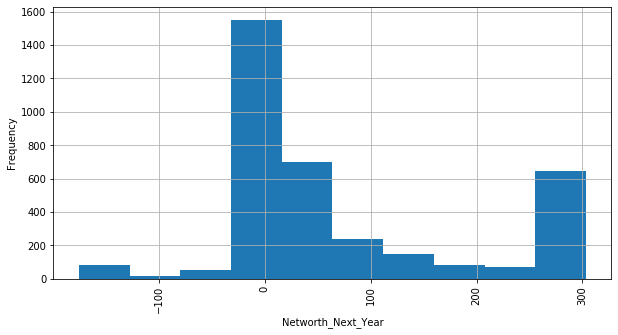

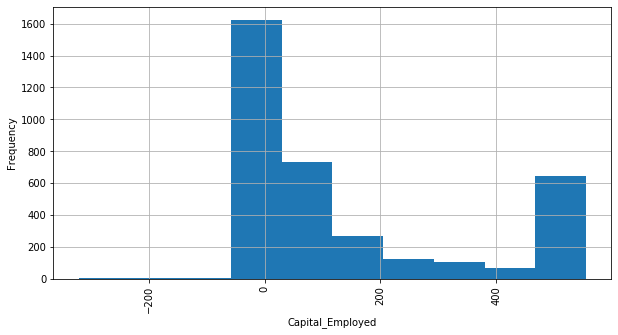

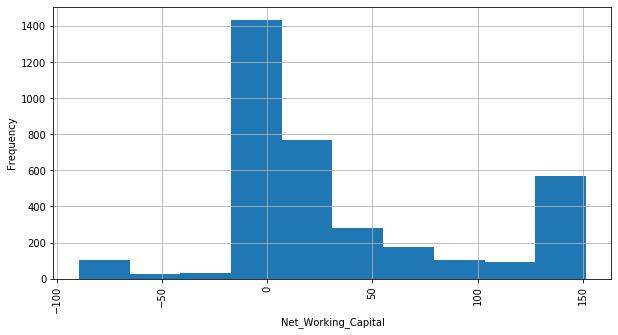

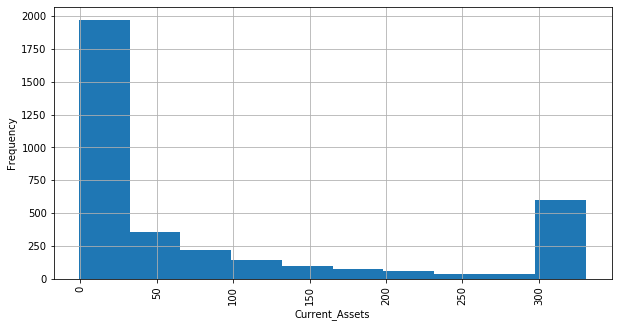

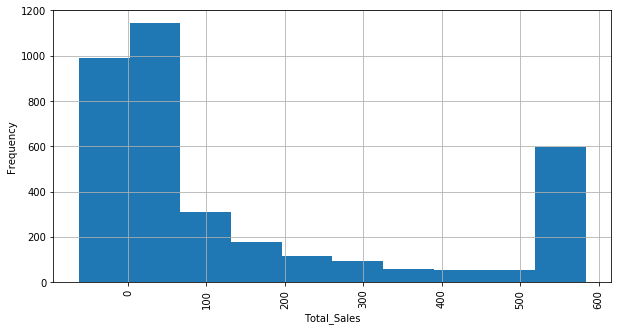

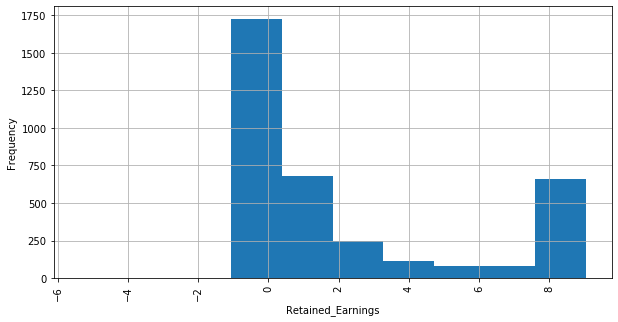

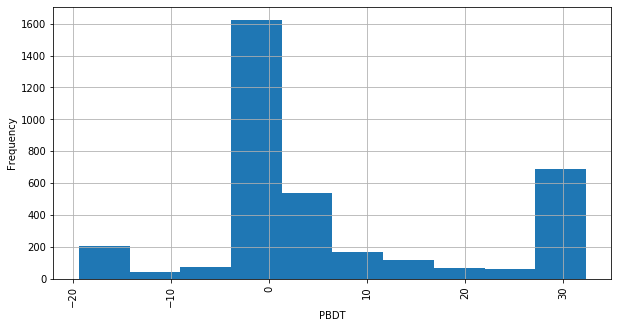

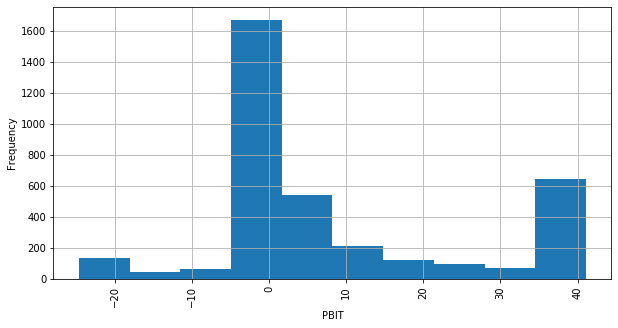

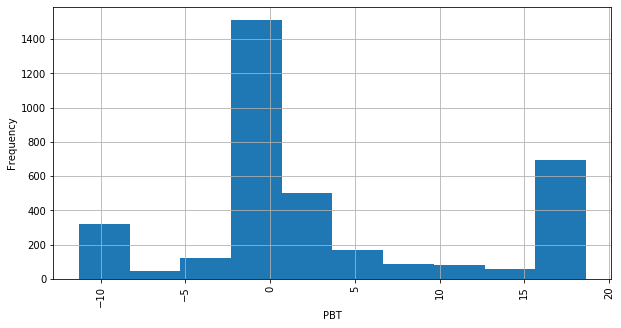

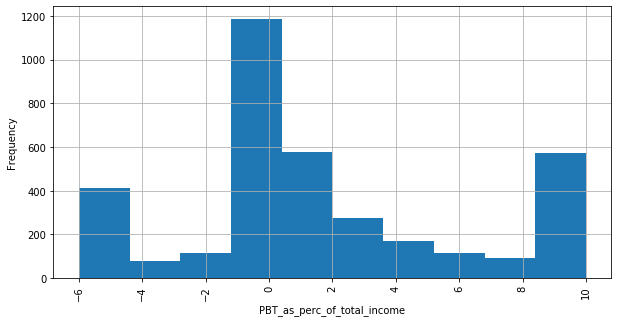

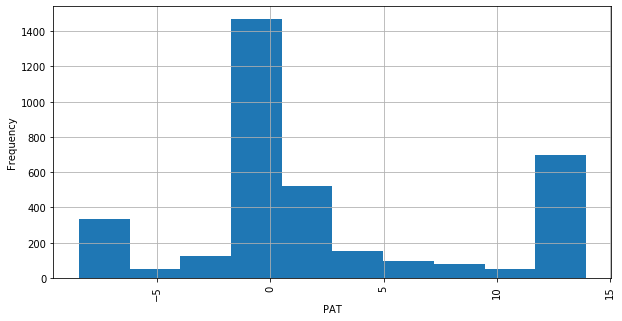

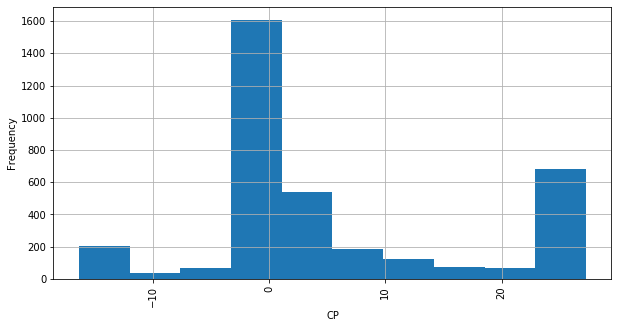

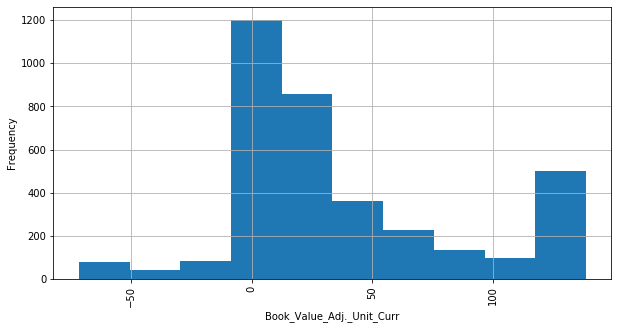

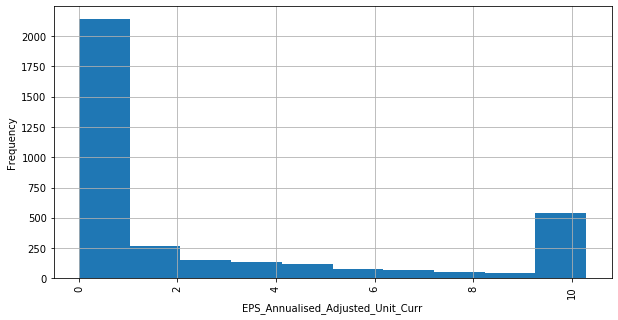

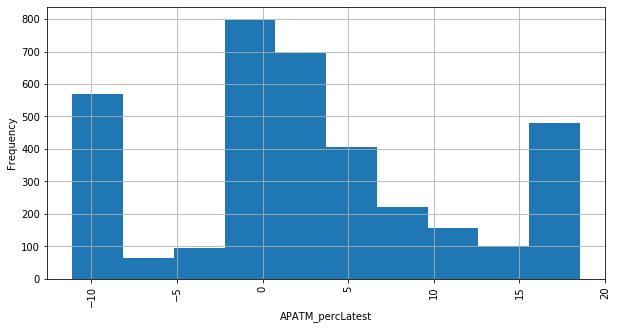

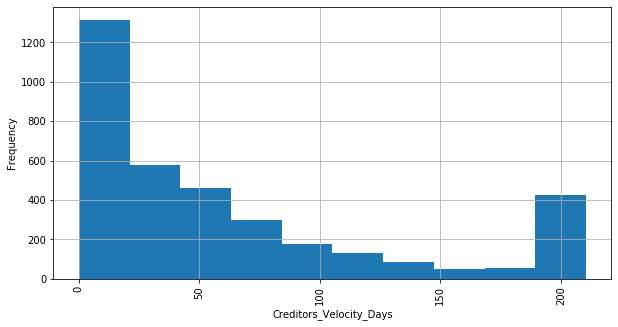

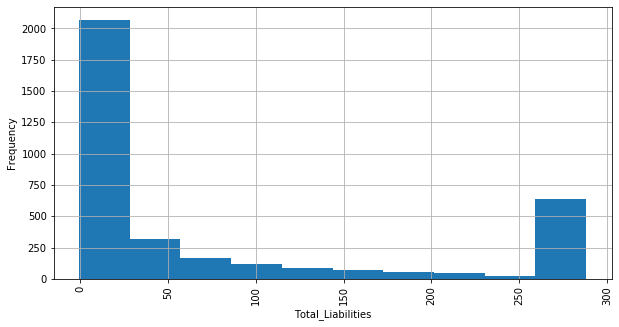

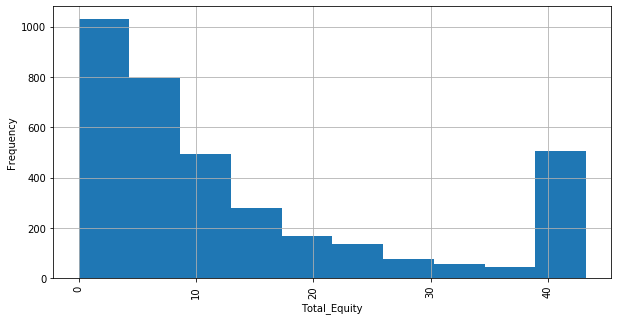

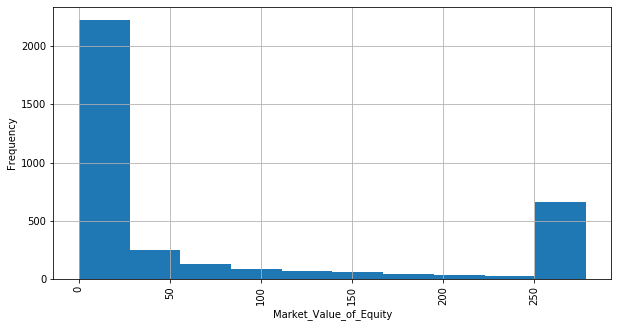

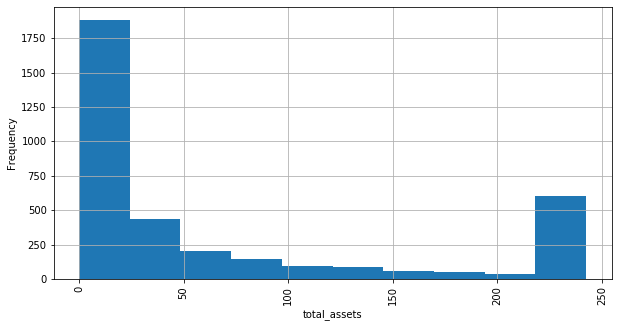

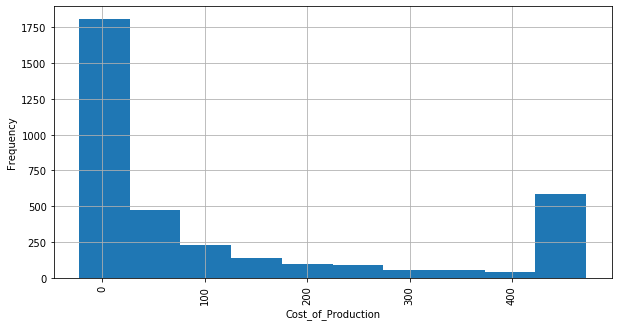

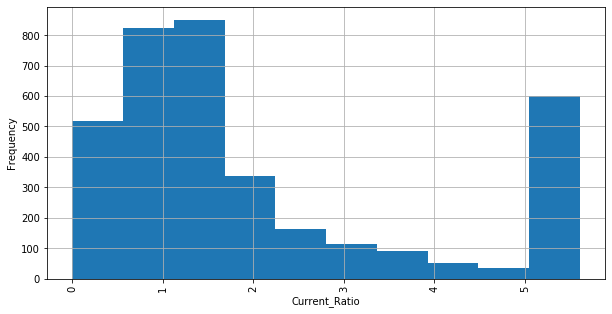

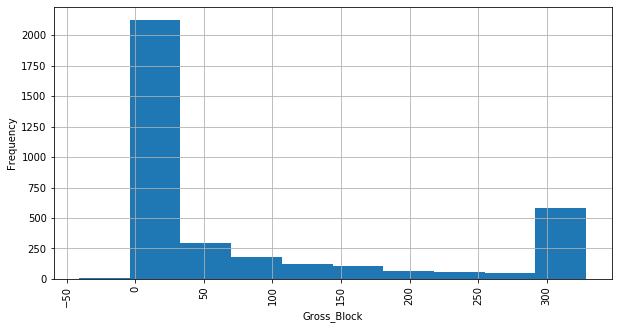

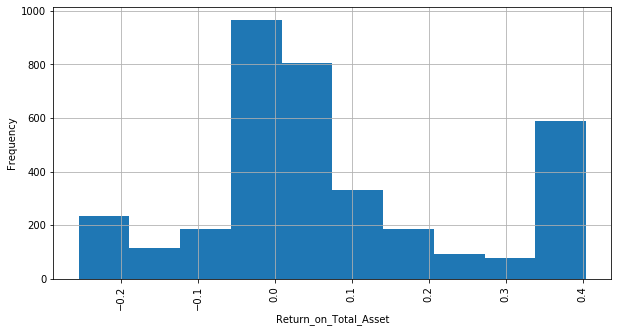

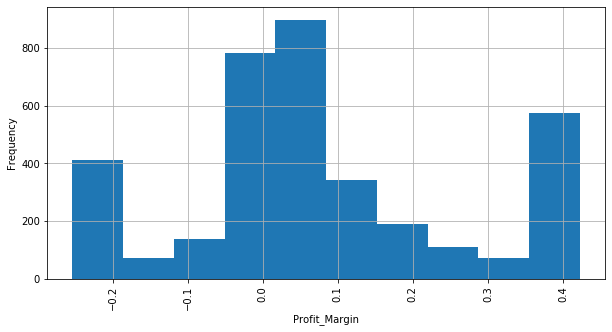

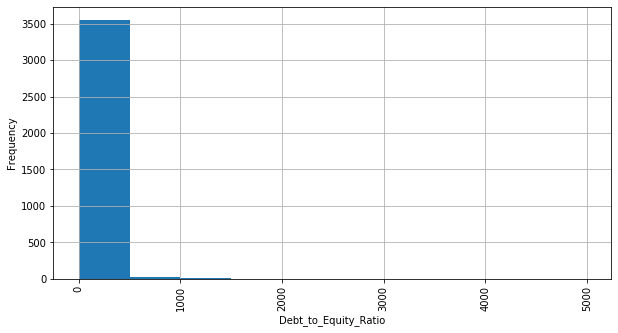

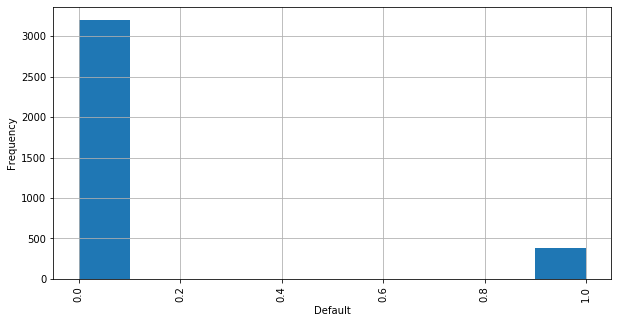

In [63]:
for i in range(len(col)):
    df[col[i]].plot(kind='hist',figsize=(10,5),grid=True),
    plt.xticks(rotation=90)
    plt.xlabel(col[i])
    plt.show()
    

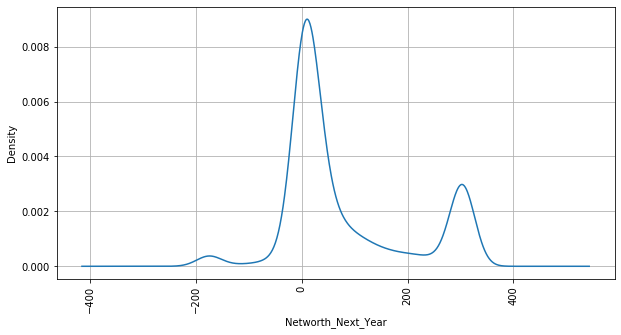

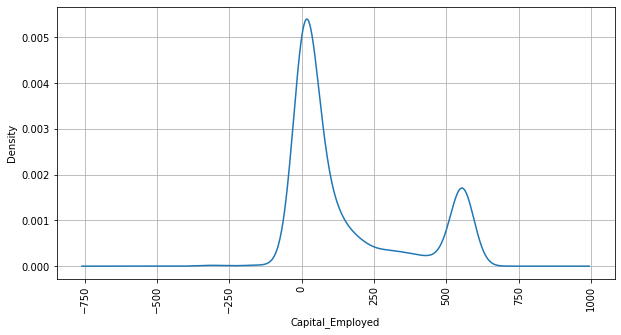

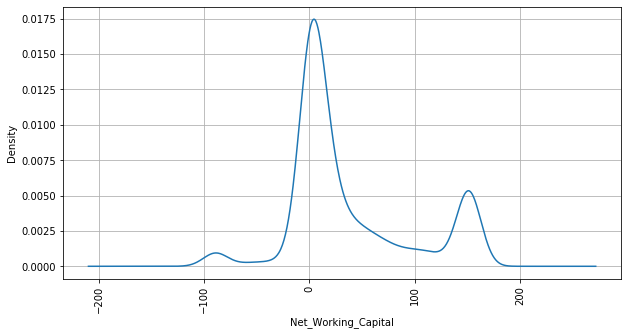

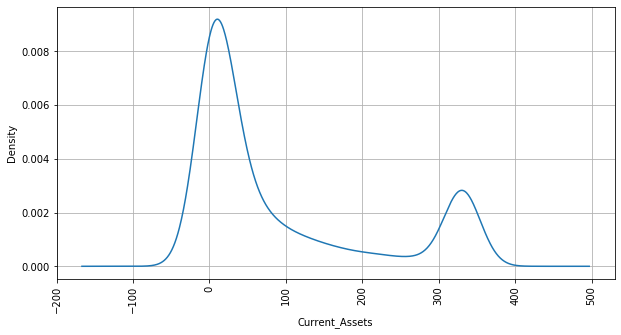

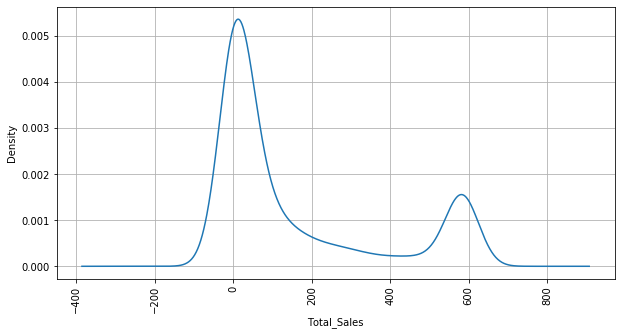

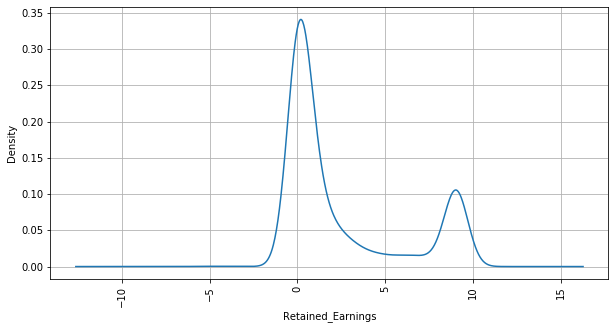

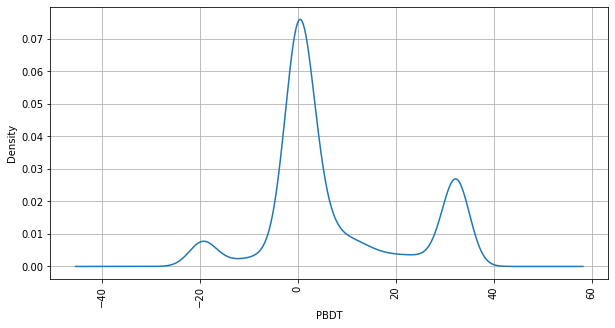

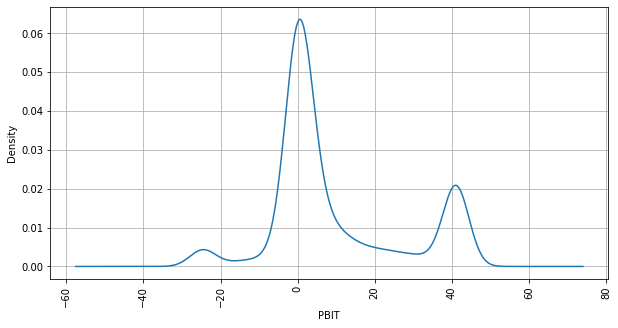

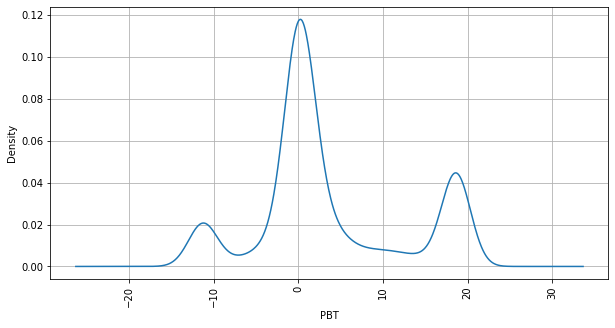

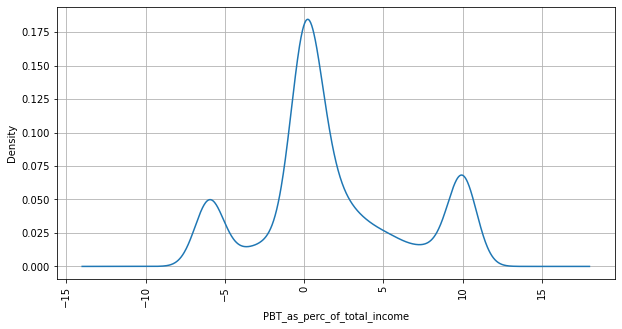

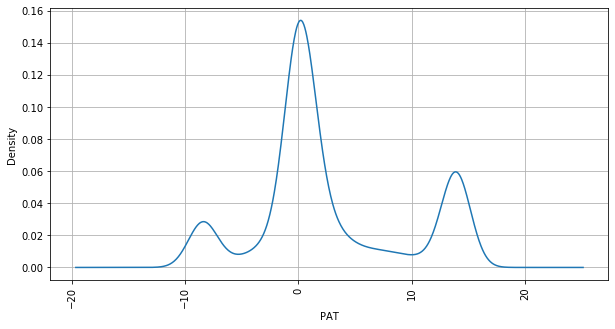

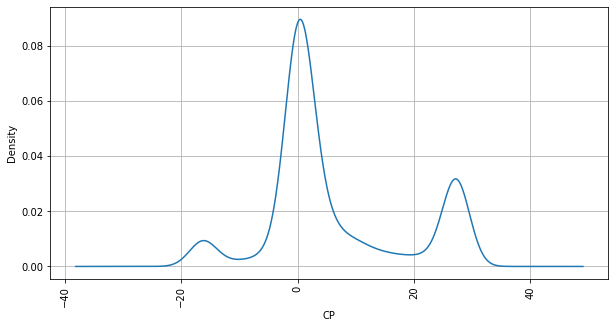

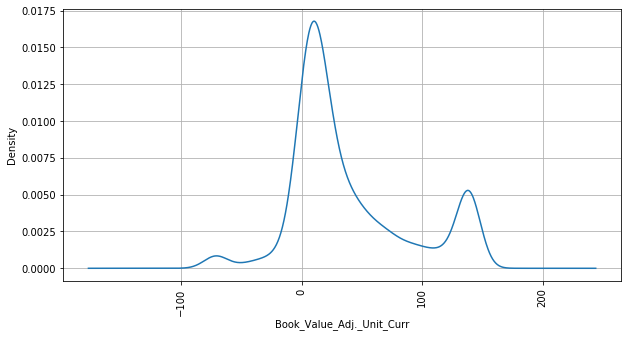

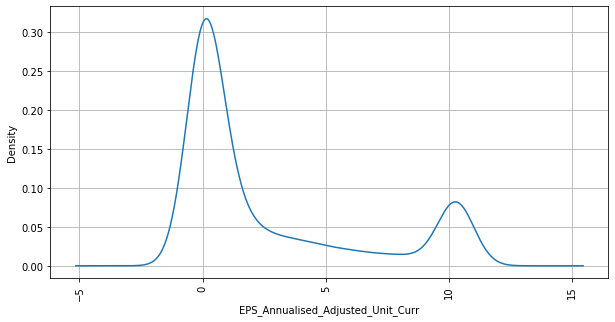

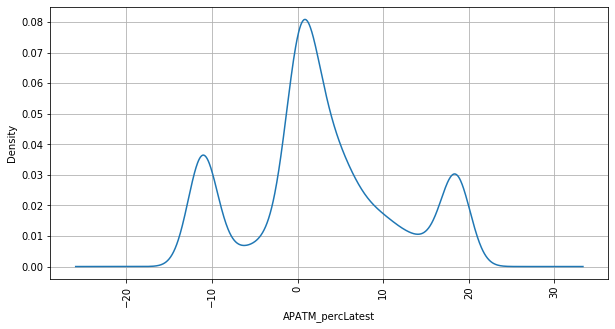

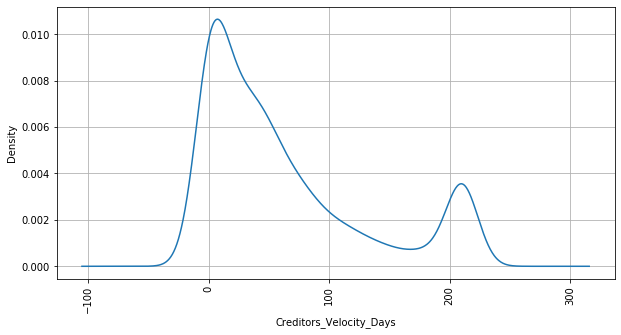

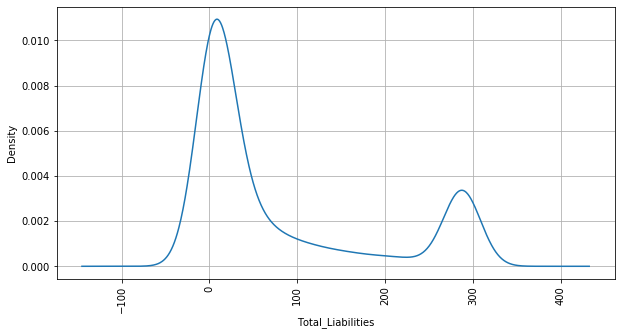

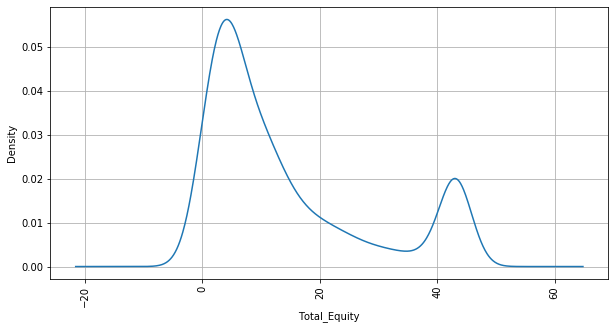

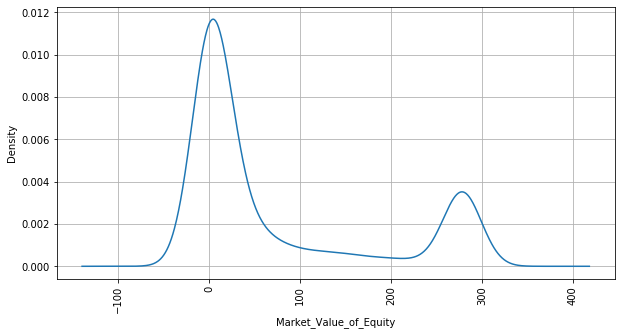

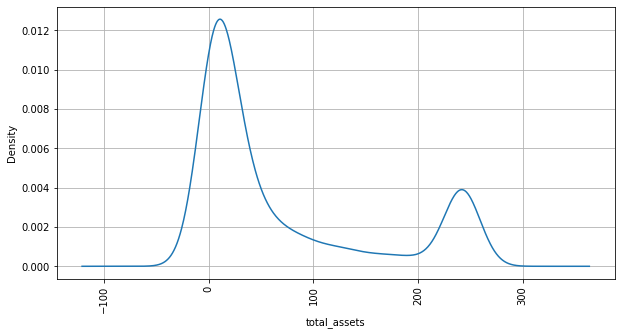

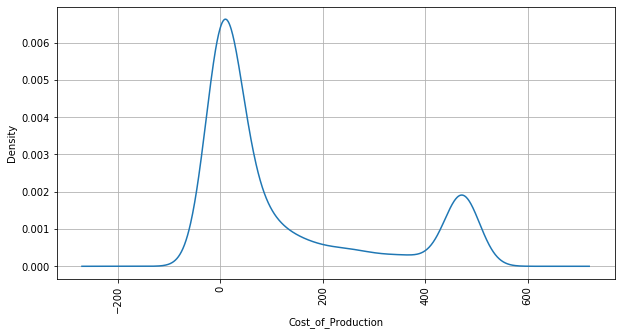

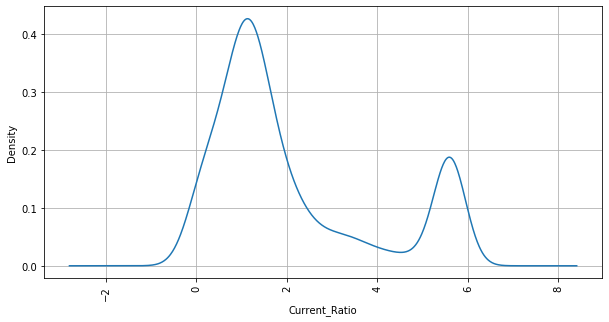

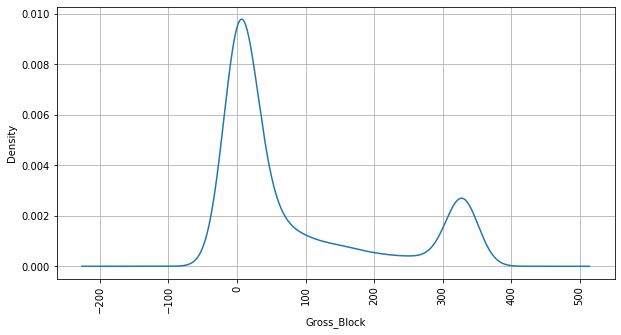

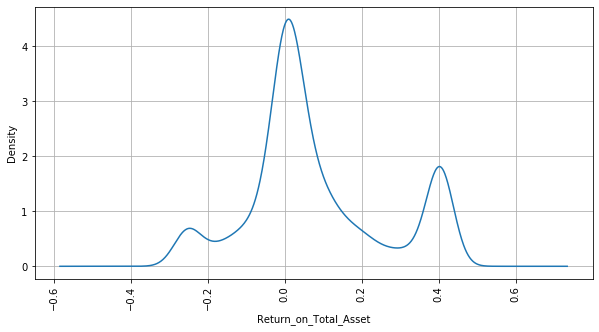

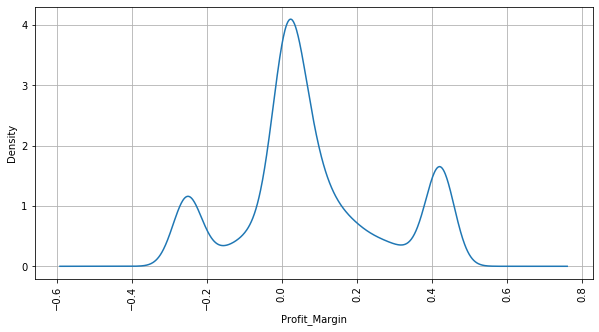

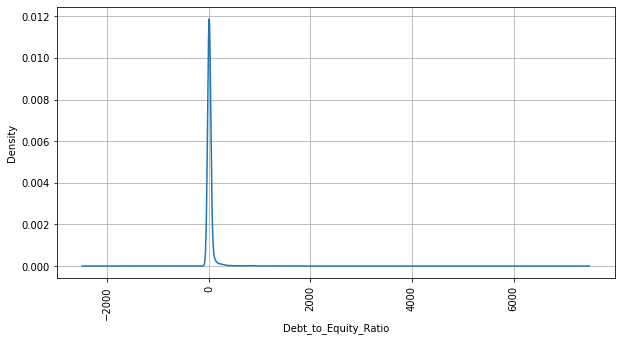

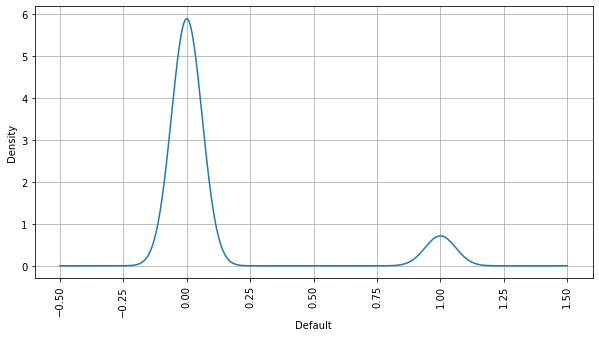

In [64]:
for i in range(len(col)):
    df[col[i]].plot(kind='kde',figsize=(10,5),grid=True),
    plt.xticks(rotation=90)
    plt.xlabel(col[i])
    plt.show()

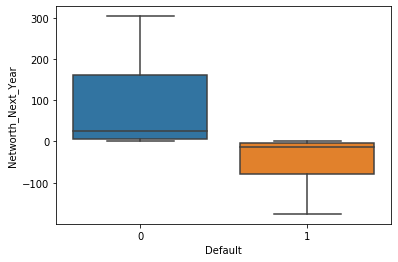

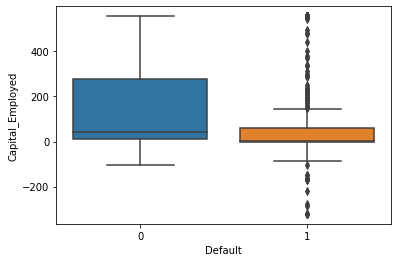

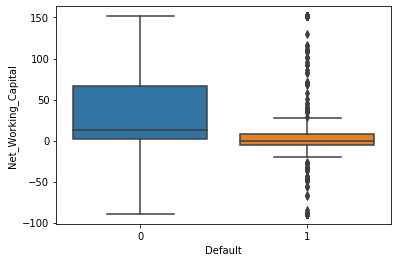

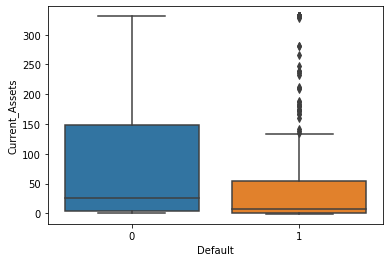

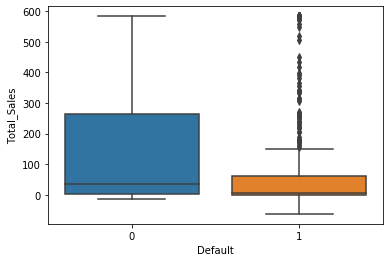

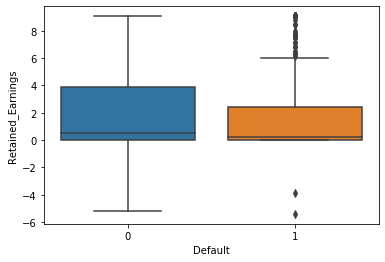

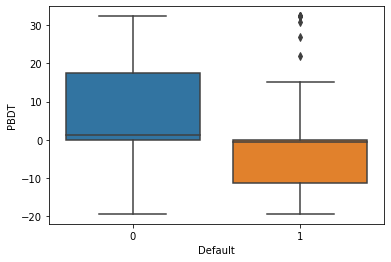

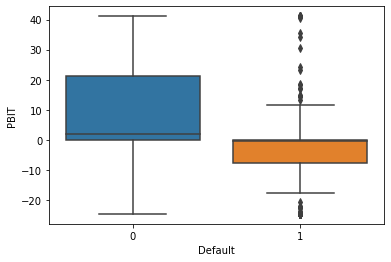

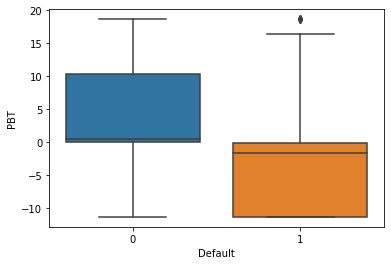

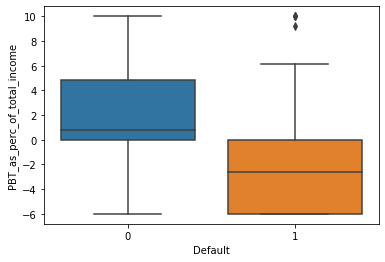

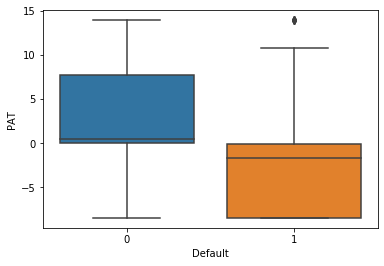

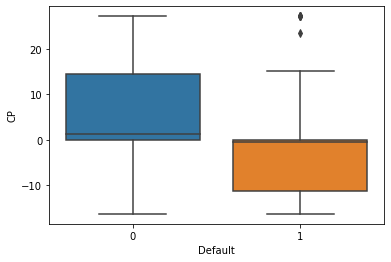

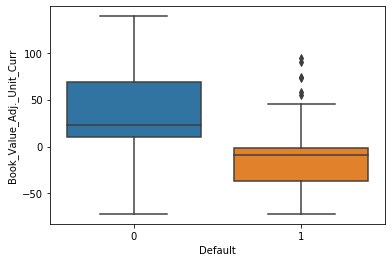

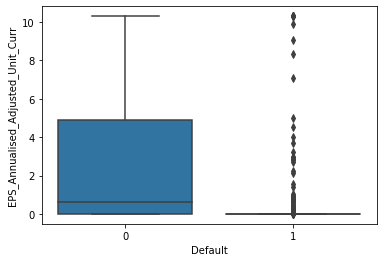

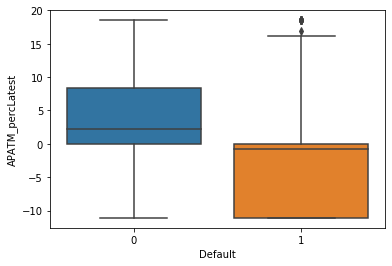

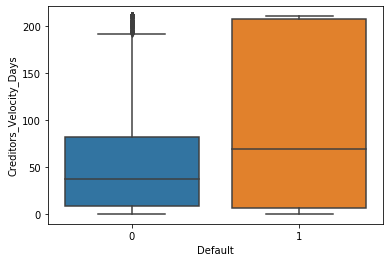

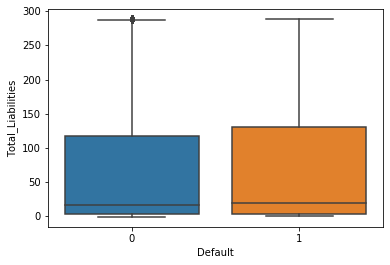

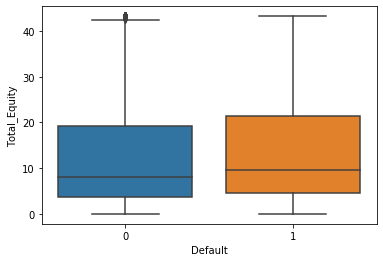

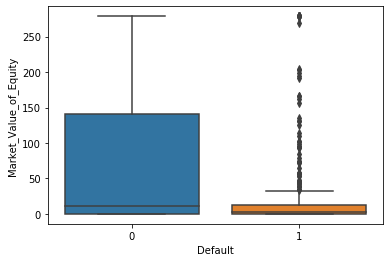

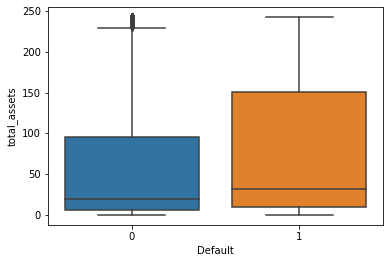

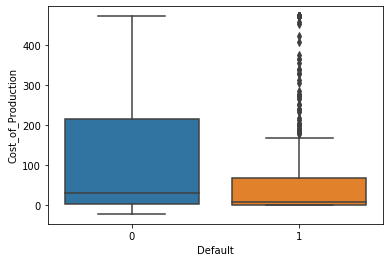

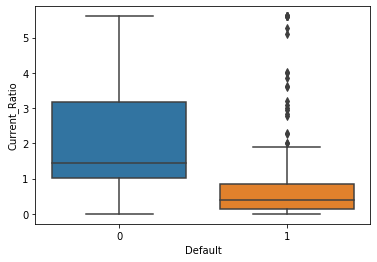

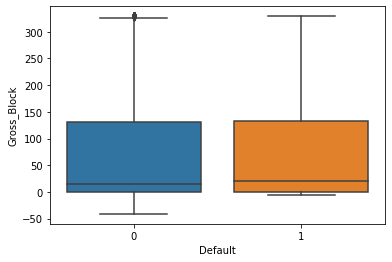

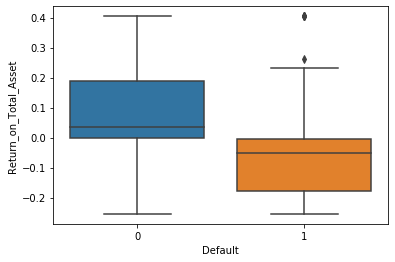

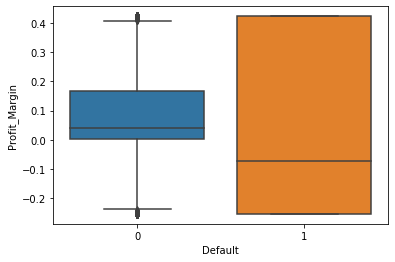

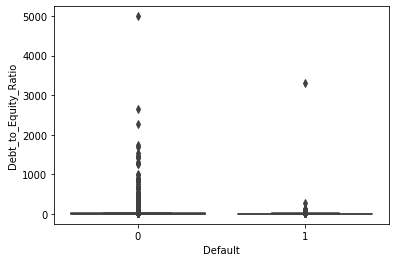

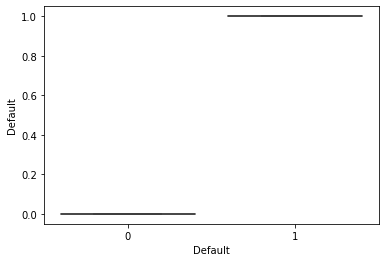

In [65]:
for i in range(len(col)):
    sns.boxplot(df['Default'], df[col[i]])
    plt.show()

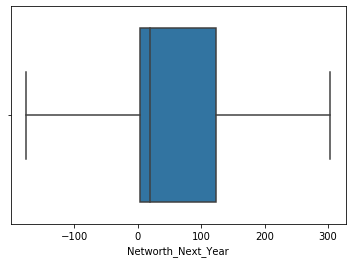

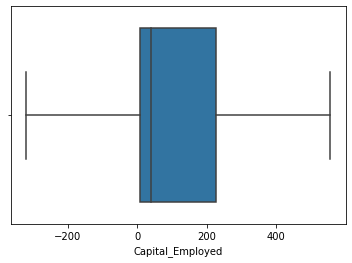

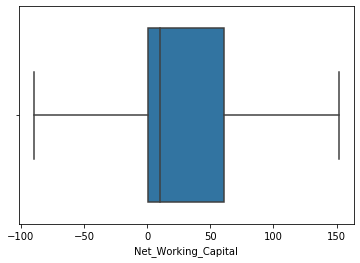

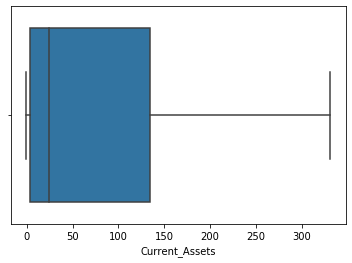

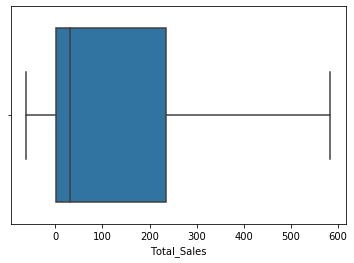

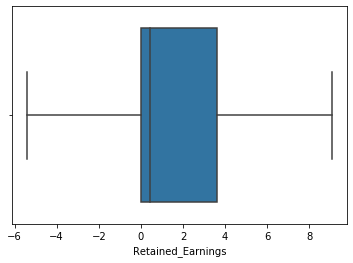

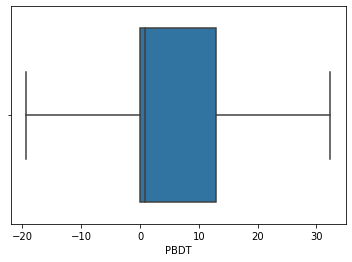

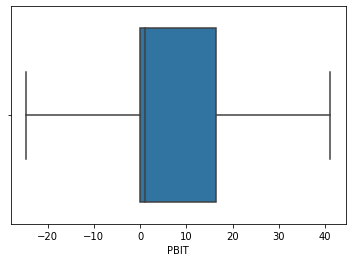

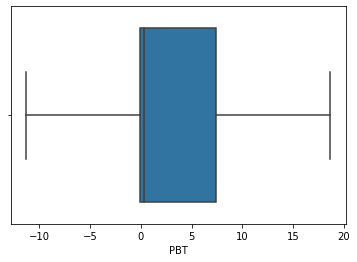

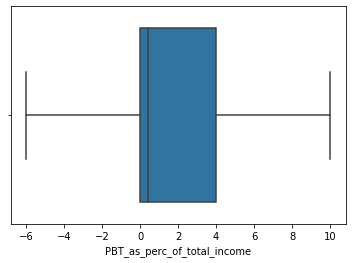

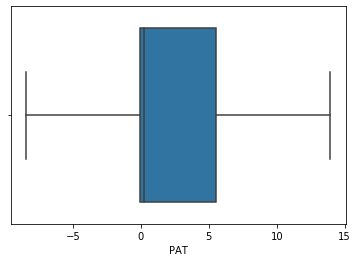

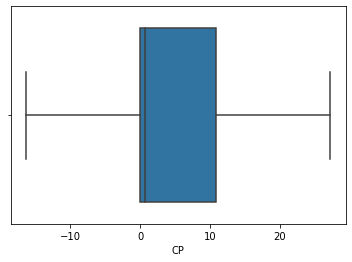

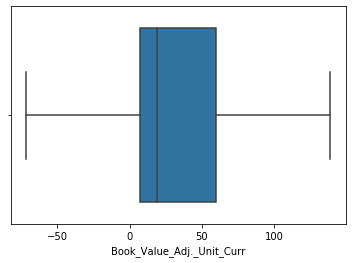

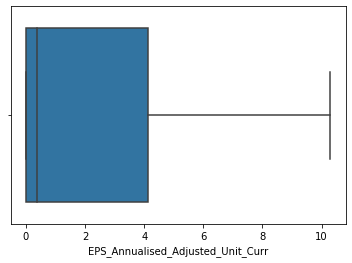

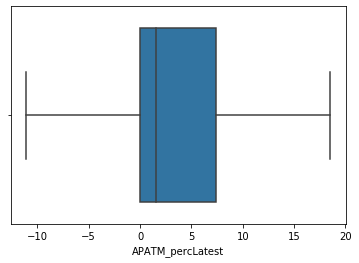

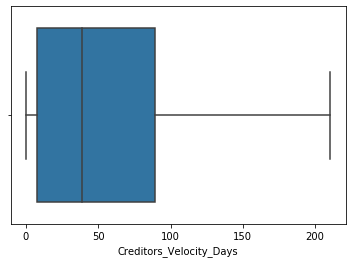

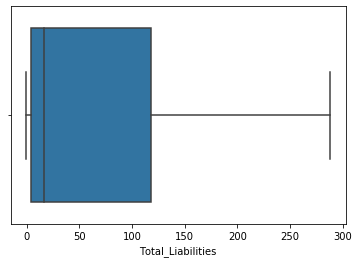

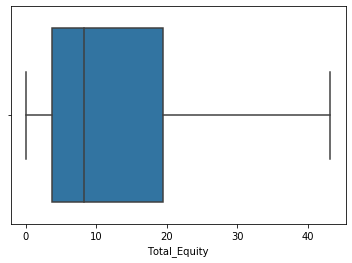

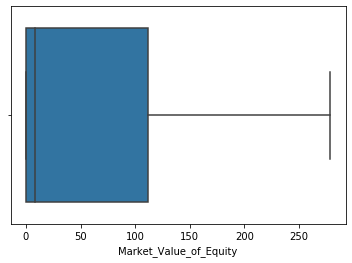

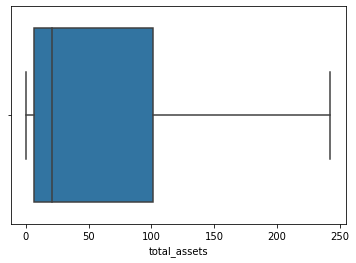

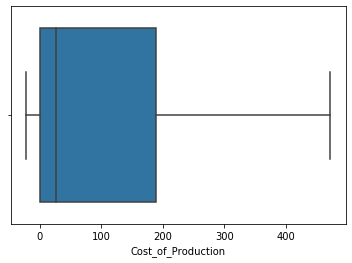

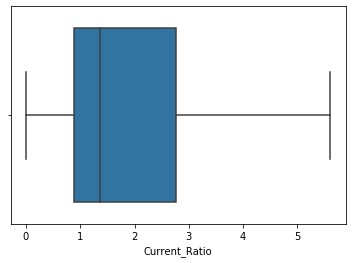

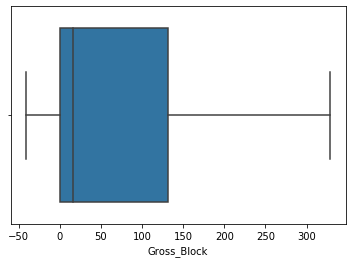

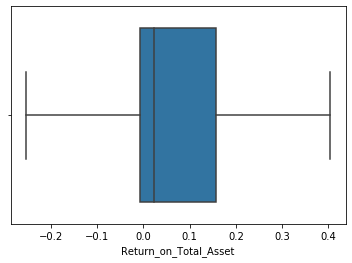

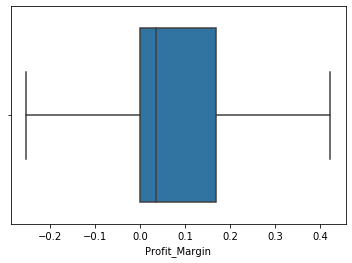

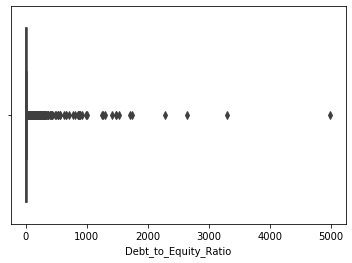

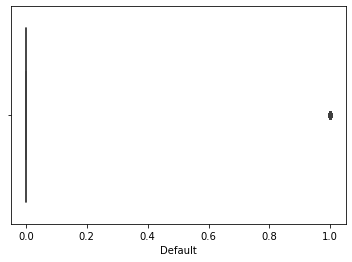

In [66]:
for i in range(len(col)):
    sns.boxplot(df[col[i]])
    plt.show()

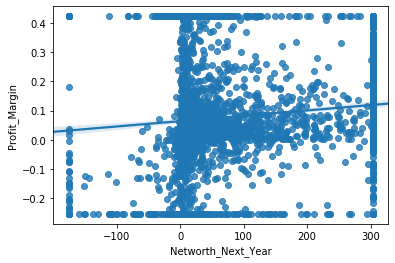

In [67]:
sns.regplot(x=df['Networth_Next_Year'],
         y=df['Profit_Margin']
        )

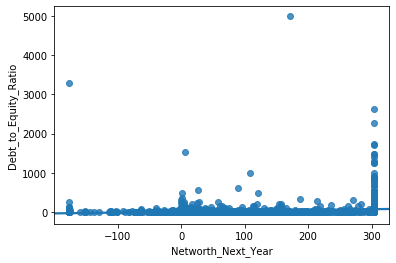

In [68]:
sns.regplot(x=df['Networth_Next_Year'],
         y=df['Debt_to_Equity_Ratio']
        )

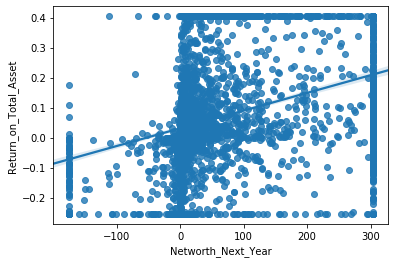

In [69]:
sns.regplot(x=df['Networth_Next_Year'],
         y=df['Return_on_Total_Asset']
        )

In [70]:
df= df.drop('Networth_Next_Year', axis = 1)

In [71]:
import statsmodels.formula.api as SM

In [72]:
df.columns

Index(['Capital_Employed', 'Net_Working_Capital', 'Current_Assets',
       'Total_Sales', 'Retained_Earnings', 'PBDT', 'PBIT', 'PBT',
       'PBT_as_perc_of_total_income', 'PAT', 'CP', 'Book_Value_Adj._Unit_Curr',
       'EPS_Annualised_Adjusted_Unit_Curr', 'APATM_percLatest',
       'Creditors_Velocity_Days', 'Total_Liabilities', 'Total_Equity',
       'Market_Value_of_Equity', 'total_assets', 'Cost_of_Production',
       'Current_Ratio', 'Gross_Block', 'Return_on_Total_Asset',
       'Profit_Margin', 'Debt_to_Equity_Ratio', 'Default'],
      dtype='object')

In [73]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(','').str.replace(')', '').str.replace('%', 'perc').str.replace('[', '').str.replace(']', '').str.replace('.', '_')

# Model 1

In [74]:
f_1 ='Default ~ Capital_Employed+Net_Working_Capital+Current_Assets+Total_Sales+Retained_Earnings+PBDT+PBIT+PBT+PBT_as_perc_of_total_income+PAT+CP+Book_Value_Adj__Unit_Curr+EPS_Annualised_Adjusted_Unit_Curr+APATM_percLatest+Creditors_Velocity_Days+Total_Liabilities+Total_Equity+Market_Value_of_Equity+total_assets+Cost_of_Production+Current_Ratio+Gross_Block+Return_on_Total_Asset+Profit_Margin+Debt_to_Equity_Ratio'

In [75]:
# Fitting the logistic regression model on 'Default' dataset

In [76]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(','').str.replace(')', '').str.replace('%', 'perc').str.replace('[', '').str.replace(']', '').str.replace('.', '_')

In [77]:
model_1 = SM.logit(formula = f_1, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.122709
         Iterations 11


In [78]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3560
Method:                           MLE   Df Model:                           25
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:                  0.6420
Time:                        15:01:03   Log-Likelihood:                -440.04
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6645      0.197     -3.373      0.001      -1.051      -0.278
Capital_Employed                     -0.0066      0.002     -2.849      0.004      -0.011      -0.002
Net_Working_Capital                   0.0024      0.004      0.596      0.551      -0.005       0.010
Current_Assets                        0.0020      0.004      0.505      0.613      -0.006       0.010
Total_Sales                          -0.0001      0.005     -0.023      0.982      -0.010       0.009
Retained_Earnings                    -0.0028      0.052     -0.054      0.957      -0.105       0.099
PBDT                                  0.0076      0.082      0.093      0.926      -0.152       0.168
PBIT                                  0.0260      0.016      1.589      0.112      -0.006       0.058
PBT                                  -0.1198      0.086     -1.392      0.164      -0.288       0.049
PBT_as_perc_of_total_income          -0.1503      0.037     -4.063      0.000      -0.223      -0.078
PAT                                   0.1685      0.113      1.488      0.137      -0.053       0.391
CP                                   -0.0981      0.098     -1.005      0.315      -0.289       0.093
Book_Value_Adj__Unit_Curr            -0.1194      0.010    -12.388      0.000      -0.138      -0.101
EPS_Annualised_Adjusted_Unit_Curr     0.1850      0.097      1.903      0.057      -0.005       0.375
APATM_percLatest                     -0.0562      0.013     -4.370      0.000      -0.081      -0.031
Creditors_Velocity_Days              -0.0001      0.001     -0.111      0.911      -0.002       0.002
Total_Liabilities                     0.0005      0.004      0.127      0.899      -0.007       0.008
Total_Equity                         -0.0216      0.013     -1.709      0.087      -0.046       0.003
Market_Value_of_Equity               -0.0039      0.002     -1.767      0.077      -0.008       0.000
total_assets                          0.0109      0.005      2.128      0.033       0.001       0.021
Cost_of_Production                   -0.0012      0.006     -0.215      0.829      -0.013       0.010
Current_Ratio                        -0.5661      0.078     -7.247      0.000      -0.719      -0.413
Gross_Block                           0.0041      0.003      1.487      0.137      -0.001       0.009
Return_on_Total_Asset                -0.6778      1.346     -0.504      0.615      -3.316       1.961
Profit_Margin                         1.3480      0.416      3.240      0.001       0.533       2.163
Debt_to_Equity_Ratio                 -0.0027      0.001     -2.044      0.041      -0.005      -0.000
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some param

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [80]:
X = df.drop('Default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables         VIF
5                                PBDT  107.892092
10                                 CP   94.447890
7                                 PBT   70.798324
9                                 PAT   64.748658
3                         Total_Sales   54.843511
19                 Cost_of_Production   45.509209
2                      Current_Assets   17.817234
0                    Capital_Employed   14.722246
18                       total_assets   14.007115
6                                PBIT   11.153287
21                        Gross_Block    8.865190
15                  Total_Liabilities    7.087069
12  EPS_Annualised_Adjusted_Unit_Curr    6.355325
16                       Total_Equity    4.931367
4                   Retained_Earnings    4.632426
17             Market_Value_of_Equity    4.433396
22              Return_on_Total_Asset    4.423088
11          Book_Value_Adj__Unit_Curr    3.882831
1                 Net_Working_Capital    3.875136
8         PBT_as_perc_of_total_income    2.550578
20                      Current_Ratio    1.934844
23                      Profit_Margin    1.736662
13                   APATM_percLatest    1.683189
14            Creditors_Velocity_Days    1.671675
24               Debt_to_Equity_Ratio    1.176009

In [81]:
X = df.drop(['PBDT','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
3                         Total_Sales  54.785916
8                                 PAT  53.018322
6                                 PBT  49.490045
18                 Cost_of_Production  45.507431
2                      Current_Assets  17.805262
9                                  CP  15.019617
0                    Capital_Employed  14.702309
17                       total_assets  13.999361
5                                PBIT  11.045816
20                        Gross_Block   8.862433
14                  Total_Liabilities   7.084564
11  EPS_Annualised_Adjusted_Unit_Curr   6.354501
15                       Total_Equity   4.924686
4                   Retained_Earnings   4.631161
16             Market_Value_of_Equity   4.432815
21              Return_on_Total_Asset   4.421661
10          Book_Value_Adj__Unit_Curr   3.882255
1                 Net_Working_Capital   3.875136
7         PBT_as_perc_of_total_income   2.550504
19                      Current_Ratio   1.934840
22                      Profit_Margin   1.736627
12                   APATM_percLatest   1.682609
13            Creditors_Velocity_Days   1.671242
23               Debt_to_Equity_Ratio   1.175880

In [82]:
X = df.drop(['Total_Sales','PBDT','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
7                                 PAT  52.827613
5                                 PBT  49.402869
2                      Current_Assets  17.128152
8                                  CP  14.975840
0                    Capital_Employed  14.472314
16                       total_assets  13.958078
4                                PBIT  10.675599
17                 Cost_of_Production   8.817069
19                        Gross_Block   8.804881
13                  Total_Liabilities   7.077961
10  EPS_Annualised_Adjusted_Unit_Curr   6.302290
14                       Total_Equity   4.884944
3                   Retained_Earnings   4.590203
15             Market_Value_of_Equity   4.424019
20              Return_on_Total_Asset   4.364354
9           Book_Value_Adj__Unit_Curr   3.873392
1                 Net_Working_Capital   3.820037
6         PBT_as_perc_of_total_income   2.544708
18                      Current_Ratio   1.933277
21                      Profit_Margin   1.736345
11                   APATM_percLatest   1.674730
12            Creditors_Velocity_Days   1.663569
22               Debt_to_Equity_Ratio   1.175665

In [83]:
X = df.drop(['Total_Sales','PBDT','PAT'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
2                      Current_Assets  17.113129
0                    Capital_Employed  14.670909
15                       total_assets  14.011467
7                                  CP  13.450348
5                                 PBT  10.985494
4                                PBIT  10.550453
16                 Cost_of_Production   8.801951
18                        Gross_Block   8.783047
12                  Total_Liabilities   7.088114
9   EPS_Annualised_Adjusted_Unit_Curr   6.661305
13                       Total_Equity   4.913382
3                   Retained_Earnings   4.592997
14             Market_Value_of_Equity   4.420768
19              Return_on_Total_Asset   4.392363
8           Book_Value_Adj__Unit_Curr   4.177726
1                 Net_Working_Capital   3.818047
6         PBT_as_perc_of_total_income   2.576130
17                      Current_Ratio   1.934379
20                      Profit_Margin   1.772984
11            Creditors_Velocity_Days   1.725246
10                   APATM_percLatest   1.685082
22                            Default   1.525268
21               Debt_to_Equity_Ratio   1.175259

In [84]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
14                       total_assets  13.482338
6                                  CP  13.318864
0                    Capital_Employed  12.874619
4                                 PBT  10.949034
3                                PBIT  10.487971
17                        Gross_Block   8.700703
15                 Cost_of_Production   7.323440
11                  Total_Liabilities   7.076628
8   EPS_Annualised_Adjusted_Unit_Curr   6.187117
12                       Total_Equity   4.877521
2                   Retained_Earnings   4.534129
13             Market_Value_of_Equity   4.399778
18              Return_on_Total_Asset   4.358628
7           Book_Value_Adj__Unit_Curr   3.840458
1                 Net_Working_Capital   3.129973
5         PBT_as_perc_of_total_income   2.543985
16                      Current_Ratio   1.929406
19                      Profit_Margin   1.735925
9                    APATM_percLatest   1.674444
10            Creditors_Velocity_Days   1.622816
20               Debt_to_Equity_Ratio   1.171934

In [85]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
6                                  CP  13.235713
0                    Capital_Employed  12.020501
4                                 PBT  10.928579
3                                PBIT  10.138962
16                        Gross_Block   8.230931
14                 Cost_of_Production   7.250840
8   EPS_Annualised_Adjusted_Unit_Curr   6.486618
11                  Total_Liabilities   5.408343
2                   Retained_Earnings   4.529925
12                       Total_Equity   4.246113
17              Return_on_Total_Asset   4.132719
13             Market_Value_of_Equity   4.102174
7           Book_Value_Adj__Unit_Curr   4.079163
1                 Net_Working_Capital   3.096415
5         PBT_as_perc_of_total_income   2.562257
15                      Current_Ratio   1.919305
18                      Profit_Margin   1.772659
9                    APATM_percLatest   1.684937
10            Creditors_Velocity_Days   1.677486
20                            Default   1.517608
19               Debt_to_Equity_Ratio   1.144209

In [86]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
0                    Capital_Employed  11.847824
3                                PBIT   7.917106
15                        Gross_Block   7.597564
4                                 PBT   7.394567
13                 Cost_of_Production   7.246137
7   EPS_Annualised_Adjusted_Unit_Curr   5.977524
10                  Total_Liabilities   5.320551
2                   Retained_Earnings   4.526131
11                       Total_Equity   4.186304
12             Market_Value_of_Equity   4.096299
16              Return_on_Total_Asset   4.086382
6           Book_Value_Adj__Unit_Curr   3.712263
1                 Net_Working_Capital   3.096396
5         PBT_as_perc_of_total_income   2.533575
14                      Current_Ratio   1.916880
17                      Profit_Margin   1.734305
8                    APATM_percLatest   1.673247
9             Creditors_Velocity_Days   1.601748
18               Debt_to_Equity_Ratio   1.143637

In [87]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
2                                PBIT  7.613429
3                                 PBT  7.391313
12                 Cost_of_Production  7.245179
14                        Gross_Block  6.988466
6   EPS_Annualised_Adjusted_Unit_Curr  5.914915
9                   Total_Liabilities  4.821935
1                   Retained_Earnings  4.473776
15              Return_on_Total_Asset  4.085273
11             Market_Value_of_Equity  4.045186
10                       Total_Equity  3.789796
5           Book_Value_Adj__Unit_Curr  3.471741
0                 Net_Working_Capital  2.716777
4         PBT_as_perc_of_total_income  2.531248
13                      Current_Ratio  1.867511
16                      Profit_Margin  1.733852
7                    APATM_percLatest  1.668207
8             Creditors_Velocity_Days  1.599527
17               Debt_to_Equity_Ratio  1.143499

In [88]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
11                 Cost_of_Production  7.121014
13                        Gross_Block  6.982542
5   EPS_Annualised_Adjusted_Unit_Curr  6.372905
8                   Total_Liabilities  4.765088
1                   Retained_Earnings  4.441028
2                                 PBT  4.334033
14              Return_on_Total_Asset  4.124241
10             Market_Value_of_Equity  4.045943
4           Book_Value_Adj__Unit_Curr  3.833631
9                        Total_Equity  3.817977
0                 Net_Working_Capital  2.704367
3         PBT_as_perc_of_total_income  2.550858
12                      Current_Ratio  1.854020
15                      Profit_Margin  1.765188
6                    APATM_percLatest  1.680342
7             Creditors_Velocity_Days  1.674278
17                            Default  1.489838
16               Debt_to_Equity_Ratio  1.143643

In [89]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT','Cost_of_Production','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
5   EPS_Annualised_Adjusted_Unit_Curr  5.767603
12                        Gross_Block  5.006554
8                   Total_Liabilities  4.753192
1                   Retained_Earnings  4.248751
2                                 PBT  4.205825
13              Return_on_Total_Asset  4.079322
10             Market_Value_of_Equity  4.032133
9                        Total_Equity  3.781300
4           Book_Value_Adj__Unit_Curr  3.394035
3         PBT_as_perc_of_total_income  2.486805
0                 Net_Working_Capital  2.440941
11                      Current_Ratio  1.850897
14                      Profit_Margin  1.700818
6                    APATM_percLatest  1.652476
7             Creditors_Velocity_Days  1.591931
15               Debt_to_Equity_Ratio  1.141976

In [90]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT','Cost_of_Production','EPS_Annualised_Adjusted_Unit_Curr','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
11                  Gross_Block  4.955289
7             Total_Liabilities  4.676129
1             Retained_Earnings  4.239900
9        Market_Value_of_Equity  3.940634
2                           PBT  3.878392
8                  Total_Equity  3.772556
12        Return_on_Total_Asset  3.495505
3   PBT_as_perc_of_total_income  2.474883
0           Net_Working_Capital  2.428710
4     Book_Value_Adj__Unit_Curr  2.394618
10                Current_Ratio  1.848043
13                Profit_Margin  1.699013
5              APATM_percLatest  1.652194
6       Creditors_Velocity_Days  1.562024
14         Debt_to_Equity_Ratio  1.134957

In [91]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT','Cost_of_Production','EPS_Annualised_Adjusted_Unit_Curr','Gross_Block','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
7             Total_Liabilities  4.229857
9        Market_Value_of_Equity  3.896257
2                           PBT  3.874078
1             Retained_Earnings  3.766067
8                  Total_Equity  3.546530
11        Return_on_Total_Asset  3.493731
3   PBT_as_perc_of_total_income  2.459796
0           Net_Working_Capital  2.419911
4     Book_Value_Adj__Unit_Curr  2.361368
10                Current_Ratio  1.797511
12                Profit_Margin  1.671403
5              APATM_percLatest  1.651938
6       Creditors_Velocity_Days  1.561756
13         Debt_to_Equity_Ratio  1.134302

In [92]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT','Cost_of_Production','EPS_Annualised_Adjusted_Unit_Curr','Gross_Block','Total_Liabilities','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
2                           PBT  3.861319
1             Retained_Earnings  3.557770
8        Market_Value_of_Equity  3.481855
10        Return_on_Total_Asset  3.421265
7                  Total_Equity  3.205370
3   PBT_as_perc_of_total_income  2.453191
4     Book_Value_Adj__Unit_Curr  2.341706
0           Net_Working_Capital  2.292396
9                 Current_Ratio  1.787882
11                Profit_Margin  1.670970
5              APATM_percLatest  1.651937
6       Creditors_Velocity_Days  1.559191
12         Debt_to_Equity_Ratio  1.091800

In [93]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT','Cost_of_Production','EPS_Annualised_Adjusted_Unit_Curr','Gross_Block','Total_Liabilities','PBT','Default'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
1             Retained_Earnings  3.496592
7        Market_Value_of_Equity  3.296076
6                  Total_Equity  3.205301
9         Return_on_Total_Asset  2.944923
3     Book_Value_Adj__Unit_Curr  2.329167
0           Net_Working_Capital  2.262077
2   PBT_as_perc_of_total_income  2.189740
8                 Current_Ratio  1.742477
4              APATM_percLatest  1.648291
10                Profit_Margin  1.647470
5       Creditors_Velocity_Days  1.522882
11         Debt_to_Equity_Ratio  1.089283

In [94]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT','Cost_of_Production','EPS_Annualised_Adjusted_Unit_Curr','Gross_Block','Total_Liabilities','PBT','Default','Retained_Earnings'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
6        Market_Value_of_Equity  3.017336
5                  Total_Equity  2.785520
8         Return_on_Total_Asset  2.778187
2     Book_Value_Adj__Unit_Curr  2.234070
0           Net_Working_Capital  2.135800
1   PBT_as_perc_of_total_income  2.009701
7                 Current_Ratio  1.697392
3              APATM_percLatest  1.647461
9                 Profit_Margin  1.647314
4       Creditors_Velocity_Days  1.517927
10         Debt_to_Equity_Ratio  1.080793

In [95]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT','Cost_of_Production','EPS_Annualised_Adjusted_Unit_Curr','Gross_Block','Total_Liabilities','PBT','Default','Retained_Earnings','Market_Value_of_Equity'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
7        Return_on_Total_Asset  2.707815
2    Book_Value_Adj__Unit_Curr  2.165160
5                 Total_Equity  2.039788
1  PBT_as_perc_of_total_income  2.009141
0          Net_Working_Capital  1.972015
6                Current_Ratio  1.664766
8                Profit_Margin  1.647229
3             APATM_percLatest  1.642106
4      Creditors_Velocity_Days  1.517730
9         Debt_to_Equity_Ratio  1.069503

In [96]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT','Cost_of_Production','EPS_Annualised_Adjusted_Unit_Curr','Gross_Block','Total_Liabilities','PBT','Default','Retained_Earnings','Market_Value_of_Equity','Return_on_Total_Asset'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
5                 Total_Equity  2.039404
2    Book_Value_Adj__Unit_Curr  1.975461
0          Net_Working_Capital  1.971326
6                Current_Ratio  1.663659
3             APATM_percLatest  1.571191
1  PBT_as_perc_of_total_income  1.534381
7                Profit_Margin  1.534064
4      Creditors_Velocity_Days  1.516557
8         Debt_to_Equity_Ratio  1.069337

In [97]:
X = df.drop(['Total_Sales','PBDT','PAT','Current_Assets','total_assets','CP','Capital_Employed','PBIT','Cost_of_Production','EPS_Annualised_Adjusted_Unit_Curr','Gross_Block','Total_Liabilities','PBT','Default','Retained_Earnings','Market_Value_of_Equity','Return_on_Total_Asset','Total_Equity'],axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
2    Book_Value_Adj__Unit_Curr  1.966202
0          Net_Working_Capital  1.639187
5                Current_Ratio  1.622968
3             APATM_percLatest  1.571040
1  PBT_as_perc_of_total_income  1.534274
6                Profit_Margin  1.533158
4      Creditors_Velocity_Days  1.335486
7         Debt_to_Equity_Ratio  1.063417

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
y = df['Default']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [101]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

# Model 2

In [102]:
model_2 = SM.logit(formula = 'Default ~ Net_Working_Capital+PBT_as_perc_of_total_income+Book_Value_Adj__Unit_Curr+APATM_percLatest+Creditors_Velocity_Days+Current_Ratio+Profit_Margin+Debt_to_Equity_Ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.130407
         Iterations 10


In [103]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:                  0.6042
Time:                        15:01:09   Log-Likelihood:                -313.24
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                4.215e-201
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7060      0.198     -3.575      0.000      -1.093      -0.319
Net_Working_Capital             0.0034      0.003      1.341      0.180      -0.002       0.008
PBT_as_perc_of_total_income    -0.1790      0.036     -5.035      0.000      -0.249      -0.109
Book_Value_Adj__Unit_Curr      -0.1159      0.011    -10.889      0.000      -0.137      -0.095
APATM_percLatest               -0.0610      0.015     -3.959      0.000      -0.091      -0.031
Creditors_Velocity_Days         0.0007      0.001      0.539      0.590      -0.002       0.003
Current_Ratio                  -0.5800      0.089     -6.514      0.000      -0.755      -0.406
Profit_Margin                   1.2201      0.477      2.560      0.010       0.286       2.154
Debt_to_Equity_Ratio            0.0003      0.003      0.122      0.903      -0.005       0.006
===============================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [104]:
#Net_Working_Capital is insignificant so removing it

# Model 3

In [105]:
model_3 = SM.logit(formula = 'Default ~ PBT_as_perc_of_total_income+Book_Value_Adj__Unit_Curr+APATM_percLatest+Creditors_Velocity_Days+Current_Ratio+Profit_Margin+Debt_to_Equity_Ratio', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.130776
         Iterations 10


In [106]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            7
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:                  0.6030
Time:                        15:01:09   Log-Likelihood:                -314.13
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                8.403e-202
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6732      0.195     -3.451      0.001      -1.056      -0.291
PBT_as_perc_of_total_income    -0.1798      0.036     -5.025      0.000      -0.250      -0.110
Book_Value_Adj__Unit_Curr      -0.1135      0.010    -10.911      0.000      -0.134      -0.093
APATM_percLatest               -0.0622      0.015     -4.047      0.000      -0.092      -0.032
Creditors_Velocity_Days         0.0007      0.001      0.532      0.595      -0.002       0.003
Current_Ratio                  -0.5720      0.087     -6.539      0.000      -0.743      -0.401
Profit_Margin                   1.1429      0.472      2.423      0.015       0.218       2.067
Debt_to_Equity_Ratio            0.0006      0.002      0.264      0.792      -0.004       0.005
===============================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Model 4 by removing Debt_to_Equity_Ratio

In [107]:
model_4 = SM.logit(formula = 'Default ~ PBT_as_perc_of_total_income+Book_Value_Adj__Unit_Curr+APATM_percLatest+Creditors_Velocity_Days+Current_Ratio+Profit_Margin', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.130788
         Iterations 10


In [108]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2395
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:                  0.6030
Time:                        15:01:10   Log-Likelihood:                -314.15
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.566e-203
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6689      0.194     -3.444      0.001      -1.050      -0.288
PBT_as_perc_of_total_income    -0.1795      0.036     -5.021      0.000      -0.250      -0.109
Book_Value_Adj__Unit_Curr      -0.1134      0.010    -10.913      0.000      -0.134      -0.093
APATM_percLatest               -0.0620      0.015     -4.042      0.000      -0.092      -0.032
Creditors_Velocity_Days         0.0007      0.001      0.537      0.591      -0.002       0.003
Current_Ratio                  -0.5721      0.087     -6.539      0.000      -0.744      -0.401
Profit_Margin                   1.1376      0.471      2.415      0.016       0.214       2.061
===============================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# model 5 by removing Creditors_Velocity_Days

In [109]:
model_5 = SM.logit(formula = 'Default ~ PBT_as_perc_of_total_income+Book_Value_Adj__Unit_Curr+APATM_percLatest+Current_Ratio+Profit_Margin', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.130848
         Iterations 10


In [110]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2396
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:                  0.6028
Time:                        15:01:10   Log-Likelihood:                -314.30
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.213e-204
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.6129      0.164     -3.748      0.000      -0.933      -0.292
PBT_as_perc_of_total_income    -0.1804      0.036     -5.061      0.000      -0.250      -0.111
Book_Value_Adj__Unit_Curr      -0.1135      0.010    -10.929      0.000      -0.134      -0.093
APATM_percLatest               -0.0621      0.015     -4.060      0.000      -0.092      -0.032
Current_Ratio                  -0.5738      0.087     -6.574      0.000      -0.745      -0.403
Profit_Margin                   1.1163      0.469      2.378      0.017       0.196       2.036
===============================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [111]:
y_prob_pred_train = model_5.predict(Default_train)

In [112]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [113]:
from sklearn import metrics

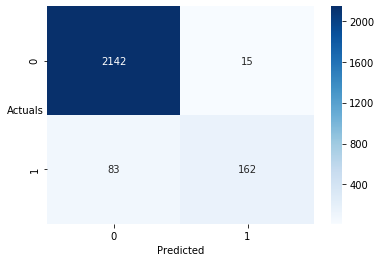

In [114]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [115]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.963     0.993     0.978      2157
           1      0.915     0.661     0.768       245

    accuracy                          0.959      2402
   macro avg      0.939     0.827     0.873      2402
weighted avg      0.958     0.959     0.956      2402



In [116]:
sensitivity_wit_half_optimum_thr_train=metrics.confusion_matrix(Default_train['Default'],y_class_pred)[0][0]/(metrics.confusion_matrix(Default_train['Default'],y_class_pred)[0][0]+metrics.confusion_matrix(Default_train['Default'],y_class_pred)[0][1])
print('sensitivity_wit_half_optimum_thr_train=',sensitivity_wit_half_optimum_thr_train)
specificity_with_half_thr_train=metrics.confusion_matrix(Default_train['Default'],y_class_pred)[1][1]/(metrics.confusion_matrix(Default_train['Default'],y_class_pred)[1][0]+metrics.confusion_matrix(Default_train['Default'],y_class_pred)[1][1])
print('specificity_with_half_thr_train=',specificity_with_half_thr_train)

sensitivity_wit_half_optimum_thr_train= 0.9930458970792768
specificity_with_half_thr_train= 0.6612244897959184


# Prediction on the Data
# Now, let us see the predicted probability values.

In [117]:
y_prob_pred_5 = model_5.predict()

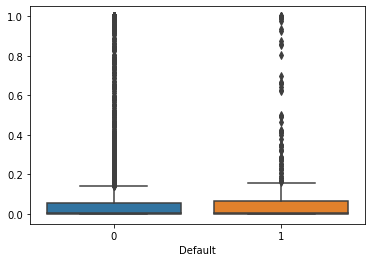

In [118]:
sns.boxplot(x=df['Default'],y=y_prob_pred_5)
plt.xlabel('Default');

In [119]:
# Choosing the optimal threshold


In [120]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],y_prob_pred_train)

In [121]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.15121785443842542

In [122]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.1521:
        a=1
    else:
        a=0
    y_class_pred.append(a)

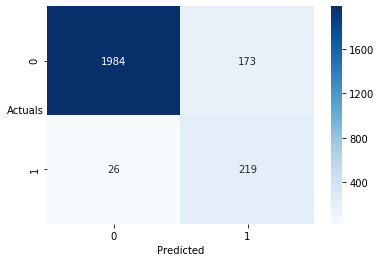

In [123]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [124]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.987     0.920     0.952      2157
           1      0.559     0.894     0.688       245

    accuracy                          0.917      2402
   macro avg      0.773     0.907     0.820      2402
weighted avg      0.943     0.917     0.925      2402



In [125]:
sensitivity_with_optimum_thr_train=metrics.confusion_matrix(Default_train['Default'],y_class_pred)[0][0]/(metrics.confusion_matrix(Default_train['Default'],y_class_pred)[0][0]+metrics.confusion_matrix(Default_train['Default'],y_class_pred)[0][1])
print('sensitivity_with_optimum_thr_train=',sensitivity_with_optimum_thr_train)
specificity_with_optimum_thr_train=metrics.confusion_matrix(Default_train['Default'],y_class_pred)[1][1]/(metrics.confusion_matrix(Default_train['Default'],y_class_pred)[1][0]+metrics.confusion_matrix(Default_train['Default'],y_class_pred)[1][1])
print('specificity_with_optimum_thr_train=',specificity_with_optimum_thr_train)

sensitivity_with_optimum_thr_train= 0.9197960129809921
specificity_with_optimum_thr_train= 0.8938775510204081


In [126]:
# Validating on the test set

In [127]:
y_prob_pred_test = model_5.predict(Default_test)

In [128]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.1521:
        a=1
    else:
        a=0
    y_class_pred.append(a)

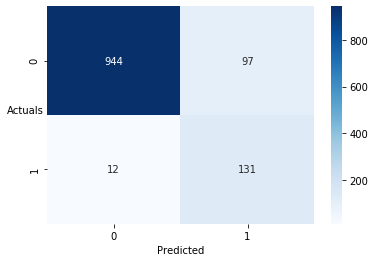

In [129]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [130]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.987     0.907     0.945      1041
           1      0.575     0.916     0.706       143

    accuracy                          0.908      1184
   macro avg      0.781     0.911     0.826      1184
weighted avg      0.938     0.908     0.917      1184



In [131]:
sensitivity_with_optimum_thr_test=metrics.confusion_matrix(Default_test['Default'],y_class_pred)[0][0]/(metrics.confusion_matrix(Default_test['Default'],y_class_pred)[0][0]+metrics.confusion_matrix(Default_test['Default'],y_class_pred)[0][1])
print('sensitivity_with_optimum_thr_test=',sensitivity_with_optimum_thr_test)
specificity_with_optimum_thr_test=metrics.confusion_matrix(Default_test['Default'],y_class_pred)[1][1]/(metrics.confusion_matrix(Default_test['Default'],y_class_pred)[1][0]+metrics.confusion_matrix(Default_test['Default'],y_class_pred)[1][1])
print('specificity_with_optimum_thr_test=',specificity_with_optimum_thr_test)

sensitivity_with_optimum_thr_test= 0.9068203650336215
specificity_with_optimum_thr_test= 0.916083916083916


In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
smt=SMOTE(random_state=33)
X_res,y_res=smt.fit_sample(X,y.ravel())

In [134]:
X.shape

(3586, 8)

In [135]:
y.shape

(3586,)

In [136]:
X_res.shape

(6396, 8)

In [137]:
y_res.shape

(6396,)

In [138]:
y_res[y_res==0].sum()

0

In [139]:
pd.DataFrame(y)['Default'].value_counts()

0    3198
1     388
Name: Default, dtype: int64

In [140]:
X_res=pd.DataFrame(X_res)
y_res=pd.DataFrame(y_res)
y_res.columns=['default']
default_smote=pd.concat([X_res,y_res],axis=1)

In [141]:
default_smote.shape


(6396, 9)

In [142]:
default_smote['default'].value_counts()

1    3198
0    3198
Name: default, dtype: int64

In [143]:
default_smote.columns

Index(['Net_Working_Capital', 'PBT_as_perc_of_total_income',
       'Book_Value_Adj__Unit_Curr', 'APATM_percLatest',
       'Creditors_Velocity_Days', 'Current_Ratio', 'Profit_Margin',
       'Debt_to_Equity_Ratio', 'default'],
      dtype='object')

In [144]:
model=SM.logit(formula='default ~ PBT_as_perc_of_total_income+Book_Value_Adj__Unit_Curr+APATM_percLatest+Current_Ratio+Profit_Margin',data=default_smote).fit()

Optimization terminated successfully.
         Current function value: 0.217501
         Iterations 9


In [145]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 6396
Model:                          Logit   Df Residuals:                     6390
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:                  0.6862
Time:                        15:01:20   Log-Likelihood:                -1391.1
converged:                       True   LL-Null:                       -4433.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.2691      0.074     17.041      0.000       1.123       1.415
PBT_as_perc_of_total_income    -0.2431      0.018    -13.841      0.000      -0.278      -0.209
Book_Value_Adj__Unit_Curr      -0.1117      0.004    -25.902      0.000      -0.120      -0.103
APATM_percLatest               -0.0788      0.007    -11.527      0.000      -0.092      -0.065
Current_Ratio                  -0.6817      0.037    -18.230      0.000      -0.755      -0.608
Profit_Margin                   1.7673      0.244      7.234      0.000       1.288       2.246
===============================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [146]:
default_smote.isna().sum()

Net_Working_Capital            0
PBT_as_perc_of_total_income    0
Book_Value_Adj__Unit_Curr      0
APATM_percLatest               0
Creditors_Velocity_Days        0
Current_Ratio                  0
Profit_Margin                  0
Debt_to_Equity_Ratio           0
default                        0
dtype: int64

In [147]:
X = default_smote[['PBT_as_perc_of_total_income','Book_Value_Adj__Unit_Curr','APATM_percLatest','Current_Ratio','Profit_Margin']]
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
0  PBT_as_perc_of_total_income  1.531926
2             APATM_percLatest  1.475271
1    Book_Value_Adj__Unit_Curr  1.425790
4                Profit_Margin  1.300225
3                Current_Ratio  1.230418

In [148]:
y = default_smote['default']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [150]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [151]:
model_7=SM.logit(formula='default ~ PBT_as_perc_of_total_income+Book_Value_Adj__Unit_Curr+APATM_percLatest+Current_Ratio+Profit_Margin',data=default_smote).fit()

Optimization terminated successfully.
         Current function value: 0.217501
         Iterations 9


In [152]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 6396
Model:                          Logit   Df Residuals:                     6390
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Sep 2020   Pseudo R-squ.:                  0.6862
Time:                        15:01:21   Log-Likelihood:                -1391.1
converged:                       True   LL-Null:                       -4433.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.2691      0.074     17.041      0.000       1.123       1.415
PBT_as_perc_of_total_income    -0.2431      0.018    -13.841      0.000      -0.278      -0.209
Book_Value_Adj__Unit_Curr      -0.1117      0.004    -25.902      0.000      -0.120      -0.103
APATM_percLatest               -0.0788      0.007    -11.527      0.000      -0.092      -0.065
Current_Ratio                  -0.6817      0.037    -18.230      0.000      -0.755      -0.608
Profit_Margin                   1.7673      0.244      7.234      0.000       1.288       2.246
===============================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [153]:
y_prob_pred_train = model_7.predict(Default_train)

In [154]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

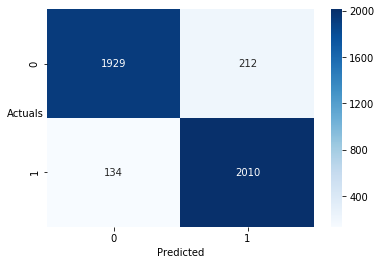

In [155]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [156]:
y_prob_pred_7 = model_7.predict()

In [157]:
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [158]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6196572609428324

In [159]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.6196:
        a=1
    else:
        a=0
    y_class_pred.append(a)

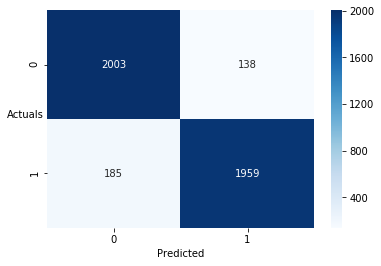

In [160]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [161]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.915     0.936     0.925      2141
           1      0.934     0.914     0.924      2144

    accuracy                          0.925      4285
   macro avg      0.925     0.925     0.925      4285
weighted avg      0.925     0.925     0.925      4285



In [162]:
smote_sensitivity_train=metrics.confusion_matrix(Default_train['default'],y_class_pred)[0][0]/(metrics.confusion_matrix(Default_train['default'],y_class_pred)[0][0]+metrics.confusion_matrix(Default_train['default'],y_class_pred)[0][1])
print('smote_sensitivity_train=',smote_sensitivity_train)
smote_specificity_train=metrics.confusion_matrix(Default_train['default'],y_class_pred)[1][1]/(metrics.confusion_matrix(Default_train['default'],y_class_pred)[1][0]+metrics.confusion_matrix(Default_train['default'],y_class_pred)[1][1])
print('smote_specificity_train=',smote_specificity_train)

smote_sensitivity_train= 0.9355441382531527
smote_specificity_train= 0.9137126865671642


In [163]:
y_prob_pred_test = model_7.predict(Default_test)

In [164]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.6196:
        a=1
    else:
        a=0
    y_class_pred.append(a)

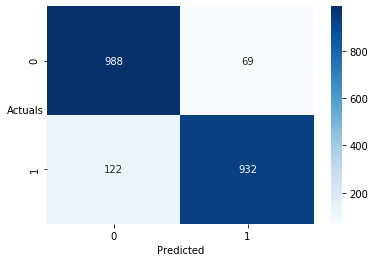

In [165]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [166]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.890     0.935     0.912      1057
           1      0.931     0.884     0.907      1054

    accuracy                          0.910      2111
   macro avg      0.911     0.909     0.909      2111
weighted avg      0.911     0.910     0.909      2111



In [167]:
smote_sensitivity=metrics.confusion_matrix(Default_test['default'],y_class_pred)[0][0]/(metrics.confusion_matrix(Default_test['default'],y_class_pred)[0][0]+metrics.confusion_matrix(Default_test['default'],y_class_pred)[0][1])
print('smote_sensitivity_test=',smote_sensitivity)
smote_specificity=metrics.confusion_matrix(Default_test['default'],y_class_pred)[1][1]/(metrics.confusion_matrix(Default_test['default'],y_class_pred)[1][0]+metrics.confusion_matrix(Default_test['default'],y_class_pred)[1][1])
print('smote_specificity_test=',smote_specificity)

smote_sensitivity_test= 0.934720908230842
smote_specificity_test= 0.8842504743833017


# Altzman Score

In [168]:
df.head()

Capital_Employed  Net_Working_Capital  Current_Assets  Total_Sales  \
0        -320.90125            -89.40625        40.50000        -0.01   
1         555.10875            -89.40625       330.98375       583.94   
2         555.10875            151.52375       330.98375       392.13   
3         555.10875            -89.40625       330.98375       583.94   
4         555.10875            151.52375       330.98375        38.72   

   Retained_Earnings     PBDT     PBIT       PBT  PBT_as_perc_of_total_income  \
0             7.6000 -19.4175 -24.6675 -11.28375                    -6.000000   
1             9.0575  -4.3200  35.5300 -11.28375                    -6.000000   
2             9.0575 -19.4175 -24.6675 -11.28375                    -6.000000   
3             9.0575 -19.4175 -24.6675 -11.28375                    -3.579585   
4             9.0575 -19.4175 -24.6675 -11.28375                    -6.000000   

    PAT      CP  Book_Value_Adj__Unit_Curr  EPS_Annualised_Adjusted_Unit_Curr  \
0 -8.46 -16.365                   -71.7975                                0.0   
1 -8.46  -4.320                   -15.1800                                0.0   
2 -8.46 -16.365                    94.1400                                0.0   
3 -8.46 -16.365                   -39.6400                                0.0   
4 -8.46 -16.365                   -71.7975                                0.0   

   APATM_percLatest  Creditors_Velocity_Days  Total_Liabilities  Total_Equity  \
0           0.00000                      0.0          288.14375      43.23125   
1         -11.11125                    101.0          288.14375      43.23125   
2         -11.11125                    210.5          288.14375      43.23125   
3         -11.11125                     63.0          288.14375      43.23125   
4          18.51875                    210.5          288.14375      43.23125   

   Market_Value_of_Equity  total_assets  Cost_of_Production  Current_Ratio  \
0                 0.00000     242.48625             137.670           0.02   
1               278.64375     242.48625             472.465           0.08   
2               278.64375     242.48625             408.510           1.06   
3               194.27000     242.48625             472.465           0.09   
4               113.68000     242.48625             186.290           0.50   

   Gross_Block  Return_on_Total_Asset  Profit_Margin  Debt_to_Equity_Ratio  \
0     328.8825              -0.146803       0.422261             14.154974   
1     328.8825              -0.065696      -0.212688              3.790509   
2     328.8825              -0.169452      -0.253357            128.984770   
3     328.8825              -0.254425      -0.253357             14.787349   
4     328.8825              -0.173831      -0.253357            114.133201   

   Default  
0        1  
1        1  
2        1  
3        1  
4        1

In [169]:

df['A']=df['Net_Working_Capital']/df['total_assets']
df['B']=df['Retained_Earnings']/df['total_assets']
df['C']=df['PBIT']/df['total_assets']
df['D']=df['Market_Value_of_Equity']/df['Total_Liabilities']
df['E']=df['Total_Sales']/df['total_assets']

In [170]:
df.head()

Capital_Employed  Net_Working_Capital  Current_Assets  Total_Sales  \
0        -320.90125            -89.40625        40.50000        -0.01   
1         555.10875            -89.40625       330.98375       583.94   
2         555.10875            151.52375       330.98375       392.13   
3         555.10875            -89.40625       330.98375       583.94   
4         555.10875            151.52375       330.98375        38.72   

   Retained_Earnings     PBDT     PBIT       PBT  PBT_as_perc_of_total_income  \
0             7.6000 -19.4175 -24.6675 -11.28375                    -6.000000   
1             9.0575  -4.3200  35.5300 -11.28375                    -6.000000   
2             9.0575 -19.4175 -24.6675 -11.28375                    -6.000000   
3             9.0575 -19.4175 -24.6675 -11.28375                    -3.579585   
4             9.0575 -19.4175 -24.6675 -11.28375                    -6.000000   

    PAT      CP  Book_Value_Adj__Unit_Curr  EPS_Annualised_Adjusted_Unit_Curr  \
0 -8.46 -16.365                   -71.7975                                0.0   
1 -8.46  -4.320                   -15.1800                                0.0   
2 -8.46 -16.365                    94.1400                                0.0   
3 -8.46 -16.365                   -39.6400                                0.0   
4 -8.46 -16.365                   -71.7975                                0.0   

   APATM_percLatest  Creditors_Velocity_Days  Total_Liabilities  Total_Equity  \
0           0.00000                      0.0          288.14375      43.23125   
1         -11.11125                    101.0          288.14375      43.23125   
2         -11.11125                    210.5          288.14375      43.23125   
3         -11.11125                     63.0          288.14375      43.23125   
4          18.51875                    210.5          288.14375      43.23125   

   Market_Value_of_Equity  total_assets  Cost_of_Production  Current_Ratio  \
0                 0.00000     242.48625             137.670           0.02   
1               278.64375     242.48625             472.465           0.08   
2               278.64375     242.48625             408.510           1.06   
3               194.27000     242.48625             472.465           0.09   
4               113.68000     242.48625             186.290           0.50   

   Gross_Block  Return_on_Total_Asset  Profit_Margin  Debt_to_Equity_Ratio  \
0     328.8825              -0.146803       0.422261             14.154974   
1     328.8825              -0.065696      -0.212688              3.790509   
2     328.8825              -0.169452      -0.253357            128.984770   
3     328.8825              -0.254425      -0.253357             14.787349   
4     328.8825              -0.173831      -0.253357            114.133201   

   Default         A         B         C         D         E  
0        1 -0.368706  0.031342 -0.101727  0.000000 -0.000041  
1        1 -0.368706  0.037353  0.146524  0.967030  2.408137  
2        1  0.624876  0.037353 -0.101727  0.967030  1.617123  
3        1 -0.368706  0.037353 -0.101727  0.674212  2.408137  
4        1  0.624876  0.037353 -0.101727  0.394525  0.159679

In [171]:
df.isna().sum()

Capital_Employed                     0
Net_Working_Capital                  0
Current_Assets                       0
Total_Sales                          0
Retained_Earnings                    0
PBDT                                 0
PBIT                                 0
PBT                                  0
PBT_as_perc_of_total_income          0
PAT                                  0
CP                                   0
Book_Value_Adj__Unit_Curr            0
EPS_Annualised_Adjusted_Unit_Curr    0
APATM_percLatest                     0
Creditors_Velocity_Days              0
Total_Liabilities                    0
Total_Equity                         0
Market_Value_of_Equity               0
total_assets                         0
Cost_of_Production                   0
Current_Ratio                        0
Gross_Block                          0
Return_on_Total_Asset                0
Profit_Margin                        0
Debt_to_Equity_Ratio                 0
Default                  

In [172]:
np.isinf(df).sum()

Capital_Employed                     0
Net_Working_Capital                  0
Current_Assets                       0
Total_Sales                          0
Retained_Earnings                    0
PBDT                                 0
PBIT                                 0
PBT                                  0
PBT_as_perc_of_total_income          0
PAT                                  0
CP                                   0
Book_Value_Adj__Unit_Curr            0
EPS_Annualised_Adjusted_Unit_Curr    0
APATM_percLatest                     0
Creditors_Velocity_Days              0
Total_Liabilities                    0
Total_Equity                         0
Market_Value_of_Equity               0
total_assets                         0
Cost_of_Production                   0
Current_Ratio                        0
Gross_Block                          0
Return_on_Total_Asset                0
Profit_Margin                        0
Debt_to_Equity_Ratio                 0
Default                  

In [173]:
df['z_Altzman_score']=1.2*df['A'] + 1.4*df['B'] + 3.3*df['C'] + 0.6*df['D'] + 1.0*df['E']

In [174]:
df.head()

Capital_Employed  Net_Working_Capital  Current_Assets  Total_Sales  \
0        -320.90125            -89.40625        40.50000        -0.01   
1         555.10875            -89.40625       330.98375       583.94   
2         555.10875            151.52375       330.98375       392.13   
3         555.10875            -89.40625       330.98375       583.94   
4         555.10875            151.52375       330.98375        38.72   

   Retained_Earnings     PBDT     PBIT       PBT  PBT_as_perc_of_total_income  \
0             7.6000 -19.4175 -24.6675 -11.28375                    -6.000000   
1             9.0575  -4.3200  35.5300 -11.28375                    -6.000000   
2             9.0575 -19.4175 -24.6675 -11.28375                    -6.000000   
3             9.0575 -19.4175 -24.6675 -11.28375                    -3.579585   
4             9.0575 -19.4175 -24.6675 -11.28375                    -6.000000   

    PAT      CP  Book_Value_Adj__Unit_Curr  EPS_Annualised_Adjusted_Unit_Curr  \
0 -8.46 -16.365                   -71.7975                                0.0   
1 -8.46  -4.320                   -15.1800                                0.0   
2 -8.46 -16.365                    94.1400                                0.0   
3 -8.46 -16.365                   -39.6400                                0.0   
4 -8.46 -16.365                   -71.7975                                0.0   

   APATM_percLatest  Creditors_Velocity_Days  Total_Liabilities  Total_Equity  \
0           0.00000                      0.0          288.14375      43.23125   
1         -11.11125                    101.0          288.14375      43.23125   
2         -11.11125                    210.5          288.14375      43.23125   
3         -11.11125                     63.0          288.14375      43.23125   
4          18.51875                    210.5          288.14375      43.23125   

   Market_Value_of_Equity  total_assets  Cost_of_Production  Current_Ratio  \
0                 0.00000     242.48625             137.670           0.02   
1               278.64375     242.48625             472.465           0.08   
2               278.64375     242.48625             408.510           1.06   
3               194.27000     242.48625             472.465           0.09   
4               113.68000     242.48625             186.290           0.50   

   Gross_Block  Return_on_Total_Asset  Profit_Margin  Debt_to_Equity_Ratio  \
0     328.8825              -0.146803       0.422261             14.154974   
1     328.8825              -0.065696      -0.212688              3.790509   
2     328.8825              -0.169452      -0.253357            128.984770   
3     328.8825              -0.254425      -0.253357             14.787349   
4     328.8825              -0.173831      -0.253357            114.133201   

   Default         A         B         C         D         E  z_Altzman_score  
0        1 -0.368706  0.031342 -0.101727  0.000000 -0.000041        -0.734311  
1        1 -0.368706  0.037353  0.146524  0.967030  2.408137         3.081729  
2        1  0.624876  0.037353 -0.101727  0.967030  1.617123         2.663785  
3        1 -0.368706  0.037353 -0.101727  0.674212  2.408137         2.086809  
4        1  0.624876  0.037353 -0.101727  0.394525  0.159679         0.862838

In [175]:
df.head()

Capital_Employed  Net_Working_Capital  Current_Assets  Total_Sales  \
0        -320.90125            -89.40625        40.50000        -0.01   
1         555.10875            -89.40625       330.98375       583.94   
2         555.10875            151.52375       330.98375       392.13   
3         555.10875            -89.40625       330.98375       583.94   
4         555.10875            151.52375       330.98375        38.72   

   Retained_Earnings     PBDT     PBIT       PBT  PBT_as_perc_of_total_income  \
0             7.6000 -19.4175 -24.6675 -11.28375                    -6.000000   
1             9.0575  -4.3200  35.5300 -11.28375                    -6.000000   
2             9.0575 -19.4175 -24.6675 -11.28375                    -6.000000   
3             9.0575 -19.4175 -24.6675 -11.28375                    -3.579585   
4             9.0575 -19.4175 -24.6675 -11.28375                    -6.000000   

    PAT      CP  Book_Value_Adj__Unit_Curr  EPS_Annualised_Adjusted_Unit_Curr  \
0 -8.46 -16.365                   -71.7975                                0.0   
1 -8.46  -4.320                   -15.1800                                0.0   
2 -8.46 -16.365                    94.1400                                0.0   
3 -8.46 -16.365                   -39.6400                                0.0   
4 -8.46 -16.365                   -71.7975                                0.0   

   APATM_percLatest  Creditors_Velocity_Days  Total_Liabilities  Total_Equity  \
0           0.00000                      0.0          288.14375      43.23125   
1         -11.11125                    101.0          288.14375      43.23125   
2         -11.11125                    210.5          288.14375      43.23125   
3         -11.11125                     63.0          288.14375      43.23125   
4          18.51875                    210.5          288.14375      43.23125   

   Market_Value_of_Equity  total_assets  Cost_of_Production  Current_Ratio  \
0                 0.00000     242.48625             137.670           0.02   
1               278.64375     242.48625             472.465           0.08   
2               278.64375     242.48625             408.510           1.06   
3               194.27000     242.48625             472.465           0.09   
4               113.68000     242.48625             186.290           0.50   

   Gross_Block  Return_on_Total_Asset  Profit_Margin  Debt_to_Equity_Ratio  \
0     328.8825              -0.146803       0.422261             14.154974   
1     328.8825              -0.065696      -0.212688              3.790509   
2     328.8825              -0.169452      -0.253357            128.984770   
3     328.8825              -0.254425      -0.253357             14.787349   
4     328.8825              -0.173831      -0.253357            114.133201   

   Default         A         B         C         D         E  z_Altzman_score  
0        1 -0.368706  0.031342 -0.101727  0.000000 -0.000041        -0.734311  
1        1 -0.368706  0.037353  0.146524  0.967030  2.408137         3.081729  
2        1  0.624876  0.037353 -0.101727  0.967030  1.617123         2.663785  
3        1 -0.368706  0.037353 -0.101727  0.674212  2.408137         2.086809  
4        1  0.624876  0.037353 -0.101727  0.394525  0.159679         0.862838

In [176]:
df['Company_Status']=df['z_Altzman_score']

In [177]:
df['Company_Status']=np.where(df['Company_Status']>2.99,5,df['Company_Status'])

In [178]:
df['Company_Status']=np.where(((df['Company_Status']<2.99) & (df['Company_Status']>=1.81)),2,df['Company_Status'])

In [179]:
df['Company_Status']=np.where(df['Company_Status']<1.81,0,df['Company_Status'])

In [180]:
df.head(20)

Capital_Employed  Net_Working_Capital  Current_Assets  Total_Sales  \
0         -320.90125            -89.40625        40.50000        -0.01   
1          555.10875            -89.40625       330.98375       583.94   
2          555.10875            151.52375       330.98375       392.13   
3          555.10875            -89.40625       330.98375       583.94   
4          555.10875            151.52375       330.98375        38.72   
5         -320.90125            -89.40625         0.00000         0.00   
6          555.10875            151.52375       330.98375       135.79   
7          555.10875            151.52375       330.98375        72.46   
8         -320.90125            -89.40625       117.67000       520.79   
9           86.35000            -89.40625       330.98375       574.33   
10        -220.49000            -89.40625        22.29000        44.35   
11         555.10875            151.52375       330.98375       583.94   
12          39.83000            -89.40625       209.05000        23.54   
13         555.10875            -89.40625       330.98375       583.94   
14         -32.81000            -89.40625       131.31000       150.13   
15         555.10875            151.52375       330.98375       583.94   
16         555.10875            151.52375       330.98375       313.08   
17         555.10875            151.52375       330.98375       583.94   
18          -7.54000             -8.45000         6.10000         0.15   
19         555.10875            151.52375        24.54000        28.33   

    Retained_Earnings     PBDT     PBIT       PBT  \
0              7.6000 -19.4175 -24.6675 -11.28375   
1              9.0575  -4.3200  35.5300 -11.28375   
2              9.0575 -19.4175 -24.6675 -11.28375   
3              9.0575 -19.4175 -24.6675 -11.28375   
4              9.0575 -19.4175 -24.6675 -11.28375   
5              0.0000   0.0000   0.0000   0.00000   
6              0.6300 -19.4175 -24.6675 -11.28375   
7              6.1700 -19.4175 -24.6675 -11.28375   
8              3.6200 -19.4175 -24.6675 -11.28375   
9              9.0575 -19.4175 -24.6675 -11.28375   
10            -3.8800  -5.0500  -6.9000  -6.96000   
11             4.0500 -19.4175 -24.6675 -11.28375   
12             0.1100 -19.4175 -24.6675 -11.28375   
13             9.0575 -19.4175 -24.6675 -11.28375   
14             8.4500 -19.4175 -24.6675 -11.28375   
15             9.0575  32.3625  41.1125  18.64625   
16            -5.4025 -19.4175 -24.6675 -11.28375   
17             9.0575 -19.4175 -24.6675 -11.28375   
18             0.0700  -1.1100  -1.1300  -1.14000   
19             0.2900 -19.4175 -24.6675 -11.28375   

    PBT_as_perc_of_total_income    PAT      CP  Book_Value_Adj__Unit_Curr  \
0                     -6.000000  -8.46 -16.365                   -71.7975   
1                     -6.000000  -8.46  -4.320                   -15.1800   
2                     -6.000000  -8.46 -16.365                    94.1400   
3                     -3.579585  -8.46 -16.365                   -39.6400   
4                     -6.000000  -8.46 -16.365                   -71.7975   
5                      0.000000   0.00   0.000                   -71.7975   
6                     -6.000000  -8.46 -16.365                   -71.7975   
7                     -6.000000  -8.46 -16.365                   -42.3700   
8                     -6.000000  -8.46 -16.365                   -25.4900   
9                     -1.184823  -8.46 -16.365                   -71.7975   
10                     1.793814  -6.74  -4.830                   -71.7975   
11                    -6.000000  -8.46 -16.365                   -71.7975   
12                    -6.000000  -8.46 -16.365                   -71.7975   
13                    -4.336342  -8.46 -16.365                   -26.9400   
14                    -6.000000  -8.46 -16.365                   -71.7975   
15                     3.005357  13.94  27.275                    42.3900   
16                     1.4

In [181]:
df.head(20)

Capital_Employed  Net_Working_Capital  Current_Assets  Total_Sales  \
0         -320.90125            -89.40625        40.50000        -0.01   
1          555.10875            -89.40625       330.98375       583.94   
2          555.10875            151.52375       330.98375       392.13   
3          555.10875            -89.40625       330.98375       583.94   
4          555.10875            151.52375       330.98375        38.72   
5         -320.90125            -89.40625         0.00000         0.00   
6          555.10875            151.52375       330.98375       135.79   
7          555.10875            151.52375       330.98375        72.46   
8         -320.90125            -89.40625       117.67000       520.79   
9           86.35000            -89.40625       330.98375       574.33   
10        -220.49000            -89.40625        22.29000        44.35   
11         555.10875            151.52375       330.98375       583.94   
12          39.83000            -89.40625       209.05000        23.54   
13         555.10875            -89.40625       330.98375       583.94   
14         -32.81000            -89.40625       131.31000       150.13   
15         555.10875            151.52375       330.98375       583.94   
16         555.10875            151.52375       330.98375       313.08   
17         555.10875            151.52375       330.98375       583.94   
18          -7.54000             -8.45000         6.10000         0.15   
19         555.10875            151.52375        24.54000        28.33   

    Retained_Earnings     PBDT     PBIT       PBT  \
0              7.6000 -19.4175 -24.6675 -11.28375   
1              9.0575  -4.3200  35.5300 -11.28375   
2              9.0575 -19.4175 -24.6675 -11.28375   
3              9.0575 -19.4175 -24.6675 -11.28375   
4              9.0575 -19.4175 -24.6675 -11.28375   
5              0.0000   0.0000   0.0000   0.00000   
6              0.6300 -19.4175 -24.6675 -11.28375   
7              6.1700 -19.4175 -24.6675 -11.28375   
8              3.6200 -19.4175 -24.6675 -11.28375   
9              9.0575 -19.4175 -24.6675 -11.28375   
10            -3.8800  -5.0500  -6.9000  -6.96000   
11             4.0500 -19.4175 -24.6675 -11.28375   
12             0.1100 -19.4175 -24.6675 -11.28375   
13             9.0575 -19.4175 -24.6675 -11.28375   
14             8.4500 -19.4175 -24.6675 -11.28375   
15             9.0575  32.3625  41.1125  18.64625   
16            -5.4025 -19.4175 -24.6675 -11.28375   
17             9.0575 -19.4175 -24.6675 -11.28375   
18             0.0700  -1.1100  -1.1300  -1.14000   
19             0.2900 -19.4175 -24.6675 -11.28375   

    PBT_as_perc_of_total_income    PAT      CP  Book_Value_Adj__Unit_Curr  \
0                     -6.000000  -8.46 -16.365                   -71.7975   
1                     -6.000000  -8.46  -4.320                   -15.1800   
2                     -6.000000  -8.46 -16.365                    94.1400   
3                     -3.579585  -8.46 -16.365                   -39.6400   
4                     -6.000000  -8.46 -16.365                   -71.7975   
5                      0.000000   0.00   0.000                   -71.7975   
6                     -6.000000  -8.46 -16.365                   -71.7975   
7                     -6.000000  -8.46 -16.365                   -42.3700   
8                     -6.000000  -8.46 -16.365                   -25.4900   
9                     -1.184823  -8.46 -16.365                   -71.7975   
10                     1.793814  -6.74  -4.830                   -71.7975   
11                    -6.000000  -8.46 -16.365                   -71.7975   
12                    -6.000000  -8.46 -16.365                   -71.7975   
13                    -4.336342  -8.46 -16.365                   -26.9400   
14                    -6.000000  -8.46 -16.365                   -71.7975   
15                     3.005357  13.94  27.275                    42.3900   
16                     1.4

In [182]:
df['Company_Status'] = df['Company_Status'].replace(0.0,'Unhealthy').replace(2.0,'Intermediate').replace(5.0,'Healthy')

In [183]:

df.head(20)

Capital_Employed  Net_Working_Capital  Current_Assets  Total_Sales  \
0         -320.90125            -89.40625        40.50000        -0.01   
1          555.10875            -89.40625       330.98375       583.94   
2          555.10875            151.52375       330.98375       392.13   
3          555.10875            -89.40625       330.98375       583.94   
4          555.10875            151.52375       330.98375        38.72   
5         -320.90125            -89.40625         0.00000         0.00   
6          555.10875            151.52375       330.98375       135.79   
7          555.10875            151.52375       330.98375        72.46   
8         -320.90125            -89.40625       117.67000       520.79   
9           86.35000            -89.40625       330.98375       574.33   
10        -220.49000            -89.40625        22.29000        44.35   
11         555.10875            151.52375       330.98375       583.94   
12          39.83000            -89.40625       209.05000        23.54   
13         555.10875            -89.40625       330.98375       583.94   
14         -32.81000            -89.40625       131.31000       150.13   
15         555.10875            151.52375       330.98375       583.94   
16         555.10875            151.52375       330.98375       313.08   
17         555.10875            151.52375       330.98375       583.94   
18          -7.54000             -8.45000         6.10000         0.15   
19         555.10875            151.52375        24.54000        28.33   

    Retained_Earnings     PBDT     PBIT       PBT  \
0              7.6000 -19.4175 -24.6675 -11.28375   
1              9.0575  -4.3200  35.5300 -11.28375   
2              9.0575 -19.4175 -24.6675 -11.28375   
3              9.0575 -19.4175 -24.6675 -11.28375   
4              9.0575 -19.4175 -24.6675 -11.28375   
5              0.0000   0.0000   0.0000   0.00000   
6              0.6300 -19.4175 -24.6675 -11.28375   
7              6.1700 -19.4175 -24.6675 -11.28375   
8              3.6200 -19.4175 -24.6675 -11.28375   
9              9.0575 -19.4175 -24.6675 -11.28375   
10            -3.8800  -5.0500  -6.9000  -6.96000   
11             4.0500 -19.4175 -24.6675 -11.28375   
12             0.1100 -19.4175 -24.6675 -11.28375   
13             9.0575 -19.4175 -24.6675 -11.28375   
14             8.4500 -19.4175 -24.6675 -11.28375   
15             9.0575  32.3625  41.1125  18.64625   
16            -5.4025 -19.4175 -24.6675 -11.28375   
17             9.0575 -19.4175 -24.6675 -11.28375   
18             0.0700  -1.1100  -1.1300  -1.14000   
19             0.2900 -19.4175 -24.6675 -11.28375   

    PBT_as_perc_of_total_income    PAT      CP  Book_Value_Adj__Unit_Curr  \
0                     -6.000000  -8.46 -16.365                   -71.7975   
1                     -6.000000  -8.46  -4.320                   -15.1800   
2                     -6.000000  -8.46 -16.365                    94.1400   
3                     -3.579585  -8.46 -16.365                   -39.6400   
4                     -6.000000  -8.46 -16.365                   -71.7975   
5                      0.000000   0.00   0.000                   -71.7975   
6                     -6.000000  -8.46 -16.365                   -71.7975   
7                     -6.000000  -8.46 -16.365                   -42.3700   
8                     -6.000000  -8.46 -16.365                   -25.4900   
9                     -1.184823  -8.46 -16.365                   -71.7975   
10                     1.793814  -6.74  -4.830                   -71.7975   
11                    -6.000000  -8.46 -16.365                   -71.7975   
12                    -6.000000  -8.46 -16.365                   -71.7975   
13                    -4.336342  -8.46 -16.365                   -26.9400   
14                    -6.000000  -8.46 -16.365                   -71.7975   
15                     3.005357  13.94  27.275                    42.3900   
16                     1.4

In [184]:
df['Company_Status'].value_counts(normalize=True)

Healthy         0.577803
Unhealthy       0.308701
Intermediate    0.113497
Name: Company_Status, dtype: float64

In [235]:
df=pd.read_csv("Credit_RiskProject_Data.csv")

In [236]:
df=df.drop('Company_Code',axis=1)

In [237]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(','').str.replace(')', '').str.replace('%', 'perc').str.replace('[', '').str.replace(']', '')

In [238]:
df['A']=df['Net_Working_Capital']/df['total_assets']
df['B']=df['Retained_Earnings']/df['total_assets']
df['C']=df['PBIT']/df['total_assets']
df['D']=df['Market_Value_of_Equity']/df['Total_Liabilities']
df['E']=df['Total_Sales']/df['total_assets']

In [239]:
df['z_Altzman_score']=1.2*df['A'] + 1.4*df['B'] + 3.3*df['C'] + 0.6*df['D'] + 1.0*df['E']

In [240]:
df['Company_Status']=df['z_Altzman_score']

In [241]:
df['Company_Status']=np.where(df['Company_Status']>=1.81,1,df['Company_Status'])

In [242]:
#df['Company_Status']=np.where(((df['Company_Status']<2.99) & (df['Company_Status']>=1.81)),2,df['Company_Status'])

In [243]:
df['Company_Status']=np.where(df['Company_Status']<1.81,0,df['Company_Status'])

In [244]:
df['Company_Status'] = df['Company_Status'].replace(0.0,'Unhealthy').replace(2.0,'Intermediate').replace(1.0,'Healthy')

In [245]:
df['Company_Status'].value_counts(normalize=True)

Unhealthy    1.0
Name: Company_Status, dtype: float64

In [246]:
df['Default']=np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [247]:
y = df['Default']

In [248]:
X=df.drop(['Default'],axis=1)

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [250]:

X_train['A']=X_train['Net_Working_Capital']/df['total_assets']
X_train['B']=X_train['Retained_Earnings']/df['total_assets']
X_train['C']=X_train['PBIT']/df['total_assets']
X_train['D']=X_train['Market_Value_of_Equity']/df['Total_Liabilities']
X_train['E']=X_train['Total_Sales']/df['total_assets']

In [251]:
X_train['Z_score']=1.2*X_train['A'] + 1.4*X_train['B'] + 3.3*X_train['C'] + 0.6*X_train['D'] + 1.0*X_train['E']

In [252]:
X_train['Company_Status']=X_train['Z_score']

In [253]:
X_train['Company_Status']=np.where(X_train['Company_Status']>=1.81,0,X_train['Company_Status'])

In [254]:
X_train['Company_Status']=np.where(X_train['Company_Status']<1.81,1,X_train['Company_Status'])

In [255]:
X_train.head()

Networth_Next_Year  Capital_Employed  Net_Working_Capital  \
662                 2.25              2.72                 1.15   
1373                9.88              9.83                 2.35   
3268              847.14           2487.52              1085.84   
3246              771.23           1869.36               829.15   
1456               11.42             15.14                 8.80   

      Current_Assets  Total_Sales  Retained_Earnings   PBDT    PBIT    PBT  \
662             1.17         0.30               0.00   0.02   -0.01  -0.01   
1373            2.71         0.16               0.40   0.17    0.17   0.17   
3268         1451.89      1516.95              10.59  70.61  224.25  33.31   
3246         1222.24         0.00              23.92  42.43   41.96  41.96   
1456            9.67        59.13               0.11   1.43    1.72   1.04   

      PBT_as_perc_of_total_income    PAT     CP  Book_Value_Adj._Unit_Curr  \
662                      0.000000  -0.01   0.02                       8.94   
1373                     0.425000   0.10   0.10                      46.59   
3268                     3.145420  17.25  54.55                     299.61   
3246                     1.754181  37.72  38.19                     163.80   
1456                     9.454545   0.72   1.11                      10.07   

      EPS_Annualised_Adjusted_Unit_Curr  APATM_percLatest  \
662                                0.00            -40.00   
1373                               0.49            130.00   
3268                               6.70            -19.38   
3246                               9.95            651.76   
1456                               0.87              1.94   

      Creditors_Velocity_Days  Total_Liabilities  Total_Equity  \
662                       0.0               8.00          3.00   
1373                      0.0               3.00          2.09   
3268                     49.0            1709.53         25.70   
3246                    348.0            1291.35         35.03   
1456                      2.0               6.87          2.50   

      Market_Value_of_Equity  total_assets  Cost_of_Production  Current_Ratio  \
662                     0.00          3.00                0.17          34.84   
1373                    0.00          2.09                0.30          11.82   
3268                  503.69       1735.23             1217.22           0.78   
3246                  163.19       1326.38               98.48           1.25   
1456                    0.00          9.37               53.83           1.82   

      Gross_Block         A         B         C         D         E  \
662          1.01  0.383333  0.000000 -0.003333  0.000000  0.100000   
1373         1.01  1.124402  0.191388  0.081340  0.000000  0.076555   
3268       488.77  0.625761  0.006103  0.129234  0.294637  0.874207   
3246      1033.28  0.625123  0.018034  0.031635  0.126372  0.000000   
1456         7.54  0.939168  0.011740  0.183565  0.000000  6.310566   

      z_Altzman_score  Company_Status   Z_score  
662          0.549000             1.0  0.549000  
1373         1.962201             1.0  1.962201  
3268         2.236917             1.0  2.236917  
3246         0.955613             1.0  0.955613  
1456         8.059765             1.0  8.059765

In [261]:
d = {'Company_Status': X_train['Company_Status'], 'y_train': y_train}
comp=pd.DataFrame(d)

In [262]:
comp.head()

Company_Status  y_train
662              1.0        0
1373             1.0        0
3268             1.0        0
3246             1.0        0
1456             1.0        0